## historical earthquake data and damage

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tontantip/Archive/refs/heads/main/earthquakes-2025-08-30_18-19-15_%2B0700.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                1140 non-null   float64
 2   Mo                                  1140 non-null   float64
 3   Dy                                  1140 non-null   float64
 4   Hr                                  1139 non-null   float64
 5   Mn                                  1139 non-null   float64
 6   Sec                                 1136 non-null   float64
 7   Tsu                                 278 non-null    float64
 8   Vol                                 11 non-null     float64
 9   Location Name                       1140 non-null   object 
 10  Latitude                            1140 non-null   float64
 11  Longitude                           1140 no

In [2]:
df.loc[df['Location Name'].str.contains('THAILAND', na=False),["Location Name","Deaths"]]

,Location Name,Deaths
120,THAILAND: MAE RIM,NaN
147,"LAOS: BOKEO; THAILAND: CHIANG RAI, CHIAN SAEN",NaN
412,MYANMAR: TACHILEK; THAILAND,104.0
590,THAILAND: CHIANG RAI,1.0
1124,MYANMAR (BURMA); THAILAND,3815.0


In [3]:
df.loc[:,["Location Name"]]

,Location Name
0,NaN
1,IRAN: GORGAN
2,JAPAN: EAST COAST HONSHU
3,NEW ZEALAND: NORTH ISLAND
4,INDONESIA: SULAWESI: PALU
...,...
1136,EL SALVADOR-GUATEMALA
1137,RUSSIA: KAMCHATKA PENINSULA
1138,TURKEY: BALIKESIR
1139,INDONESIA: SULAWESI: POSO


In [4]:
coun = [
    'AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
    'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA',
    'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH', 'BARBADOS',
    'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
    'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM',
    'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CABO VERDE', 'CAMBODIA',
    'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE',
    'CHINA', 'COLOMBIA', 'COMOROS', 'REPUBLIC OF THE CONGO', 'COSTA RICA',
    'CÔTE D\'IVOIRE', 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC',
    'DEMOCRATIC REPUBLIC OF THE CONGO', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
    'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EL SALVADOR', 'EQUATORIAL GUINEA',
    'ERITREA', 'ESTONIA', 'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND',
    'FRANCE', 'GABON', 'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE',
    'GRENADA', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI',
    'HONDURAS', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN', 'IRAQ',
    'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN', 'KAZAKHSTAN',
    'KENYA', 'KIRIBATI', 'NORTH KOREA', 'SOUTH KOREA', 'KUWAIT', 'KYRGYZSTAN',
    'LAOS', 'LATVIA', 'LEBANON', 'LESOTHO', 'LIBERIA', 'LIBYA', 'LIECHTENSTEIN',
    'LITHUANIA', 'LUXEMBOURG', 'MADAGASCAR', 'MALAWI', 'MALAYSIA', 'MALDIVES',
    'MALI', 'MALTA', 'MARSHALL ISLANDS', 'MAURITANIA', 'MAURITIUS', 'MEXICO',
    'MICRONESIA', 'MOLDOVA', 'MONACO', 'MONGOLIA', 'MONTENEGRO', 'MOROCCO',
    'MOZAMBIQUE', 'MYANMAR', 'NAMIBIA', 'NAURU', 'NEPAL', 'NETHERLANDS',
    'NEW ZEALAND', 'NICARAGUA', 'NIGER', 'NIGERIA', 'NORTH MACEDONIA', 'NORWAY',
    'OMAN', 'PAKISTAN', 'PALAU', 'PANAMA', 'PAPUA NEW GUINEA', 'PARAGUAY',
    'PERU', 'PHILIPPINES', 'POLAND', 'PORTUGAL', 'QATAR', 'ROMANIA', 'RUSSIA',
    'RWANDA', 'SAINT KITTS AND NEVIS', 'SAINT LUCIA', 'SAINT VINCENT AND THE GRENADINES',
    'SAMOA', 'SAN MARINO', 'SAO TOME AND PRINCIPE', 'SAUDI ARABIA', 'SENEGAL',
    'SERBIA', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 'SLOVAKIA', 'SLOVENIA',
    'SOLOMON ISLANDS', 'SOMALIA', 'SOUTH AFRICA', 'SOUTH SUDAN', 'SPAIN',
    'SRI LANKA', 'SUDAN', 'SURINAME', 'SWEDEN', 'SWITZERLAND', 'SYRIAN ARAB REPUBLIC',
    'TAIWAN', 'TAJIKISTAN', 'TANZANIA', 'THAILAND', 'TIMOR-LESTE', 'TOGO', 'TONGA',
    'TRINIDAD AND TOBAGO', 'TUNISIA', 'TURKEY', 'TURKMENISTAN', 'TUVALU', 'UGANDA',
    'UKRAINE', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA',
    'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VATICAN CITY', 'VENEZUELA', 'VIETNAM',
    'YEMEN', 'ZAMBIA', 'ZIMBABWE'
]

In [5]:
coun = pd.DataFrame(coun)


In [6]:
country_list = coun[0].tolist()
for country in country_list:
    # สร้างเงื่อนไขการค้นหา: ตรวจสอบว่า Location Name มีชื่อประเทศนั้นหรือไม่
    # str.contains() จะช่วยค้นหาส่วนหนึ่งของสตริง
    condition = df['Location Name'].str.contains(country, case=False, na=False)

    # อัปเดต column 'Country' ด้วยชื่อประเทศที่ตรงกับเงื่อนไข
    df.loc[condition, 'Country'] = country

df.loc[:,["Location Name", "Country", "Deaths","Total Deaths"]]

,Location Name,Country,Deaths,Total Deaths
0,NaN,NaN,NaN,NaN
1,IRAN: GORGAN,IRAN,NaN,NaN
2,JAPAN: EAST COAST HONSHU,JAPAN,NaN,NaN
3,NEW ZEALAND: NORTH ISLAND,NEW ZEALAND,NaN,NaN
4,INDONESIA: SULAWESI: PALU,INDONESIA,1.0,1.0
...,...,...,...,...
1136,EL SALVADOR-GUATEMALA,GUATEMALA,1.0,1.0
1137,RUSSIA: KAMCHATKA PENINSULA,RUSSIA,NaN,1.0
1138,TURKEY: BALIKESIR,TURKEY,1.0,1.0
1139,INDONESIA: SULAWESI: POSO,INDONESIA,1.0,1.0


In [7]:
df.describe().loc[:,"Deaths"]

,Deaths
count,469.000000
mean,1253.827292
std,15744.176972
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,316000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                1140 non-null   float64
 2   Mo                                  1140 non-null   float64
 3   Dy                                  1140 non-null   float64
 4   Hr                                  1139 non-null   float64
 5   Mn                                  1139 non-null   float64
 6   Sec                                 1136 non-null   float64
 7   Tsu                                 278 non-null    float64
 8   Vol                                 11 non-null     float64
 9   Location Name                       1140 non-null   object 
 10  Latitude                            1140 non-null   float64
 11  Longitude                           1140 no

In [9]:
df.loc[df['Location Name'].str.contains('THAILAND', na=False),["Location Name","Deaths","Country","Year"]]

,Location Name,Deaths,Country,Year
120,THAILAND: MAE RIM,NaN,THAILAND,2006.0
147,"LAOS: BOKEO; THAILAND: CHIANG RAI, CHIAN SAEN",NaN,THAILAND,2007.0
412,MYANMAR: TACHILEK; THAILAND,104.0,THAILAND,2011.0
590,THAILAND: CHIANG RAI,1.0,THAILAND,2014.0
1124,MYANMAR (BURMA); THAILAND,3815.0,THAILAND,2025.0


df group by deaths

In [10]:
group_data = df.groupby('Country')
country_deaths = df.groupby('Country')['Deaths'].sum()
country_deaths.sort_values(ascending=False).head(15)


,Deaths
Country,
HAITI,318272.0
CHINA,92279.0
PAKISTAN,78472.0
TURKEY,57583.0
INDONESIA,14389.0
NEPAL,9368.0
THAILAND,3920.0
MOROCCO,2947.0
JAPAN,2398.0


df group by time earthquake

In [11]:
group_data = df.groupby('Country')
country_count = df.groupby('Country')['Country'].count()
country_count = pd.DataFrame(country_count)
country_count

,Country
Country,
AFGHANISTAN,14
ALBANIA,6
ALGERIA,10
ARGENTINA,5
AUSTRALIA,4
...,...
VANUATU,22
VENEZUELA,8
VIETNAM,2


df group by total deaths

In [12]:
group_data = df.groupby('Country')
ttdeath_count = df.groupby('Country')['Total Deaths'].sum()
ttdeath_count = pd.DataFrame(ttdeath_count)
ttdeath_count

,Total Deaths
Country,
AFGHANISTAN,2063.0
ALBANIA,1.0
ALGERIA,14.0
ARGENTINA,4.0
AUSTRALIA,0.0
...,...
VANUATU,14.0
VENEZUELA,7.0
VIETNAM,0.0


In [13]:
damage_country = df.groupby("Country")["Total Damage ($Mil)"].sum()
total_damage = damage_country[damage_country > 1].sort_values(ascending=True).tail(20)

Shape of total_damage DataFrame: (20,)


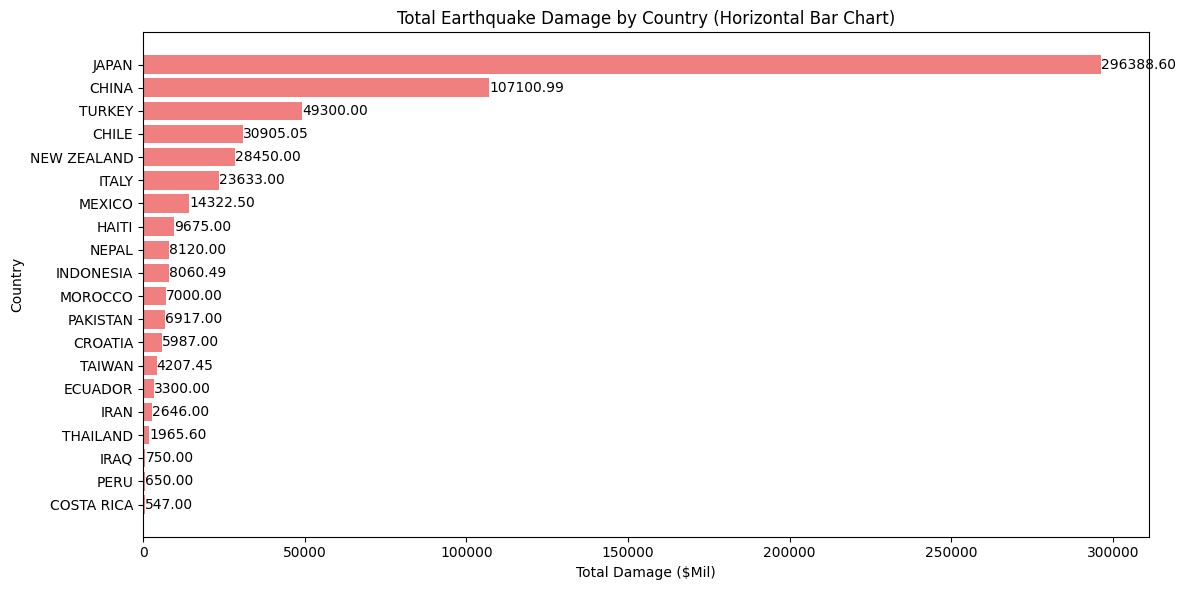

In [14]:
import matplotlib.pyplot as plt

print("Shape of total_damage DataFrame:", total_damage.shape)

# Reset index to make 'Country' a column
total_damage_index = total_damage.reset_index()

plt.figure(figsize=(12, 6)) # Adjust figure size for horizontal bars
bars = plt.barh(total_damage_index["Country"], total_damage_index["Total Damage ($Mil)"], color='lightcoral')
plt.xlabel("Total Damage ($Mil)")
plt.ylabel("Country")
plt.title("Total Earthquake Damage by Country (Horizontal Bar Chart)")
for bar in bars:
    # Use bar.get_width() for the value of a horizontal bar
    width = bar.get_width()
    # Place text at the end of the bar, with a small offset
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                1140 non-null   float64
 2   Mo                                  1140 non-null   float64
 3   Dy                                  1140 non-null   float64
 4   Hr                                  1139 non-null   float64
 5   Mn                                  1139 non-null   float64
 6   Sec                                 1136 non-null   float64
 7   Tsu                                 278 non-null    float64
 8   Vol                                 11 non-null     float64
 9   Location Name                       1140 non-null   object 
 10  Latitude                            1140 non-null   float64
 11  Longitude                           1140 no

In [16]:
even_year = df[["Year","Mag"]].groupby("Year").count()
even_year = even_year.reset_index()
even_year["Year"] = even_year["Year"].astype(int).astype(str)
even_year

,Year,Mag
0,2005,60
1,2006,65
2,2007,67
3,2008,76
4,2009,62
5,2010,64
6,2011,62
7,2012,52
8,2013,56
9,2014,56


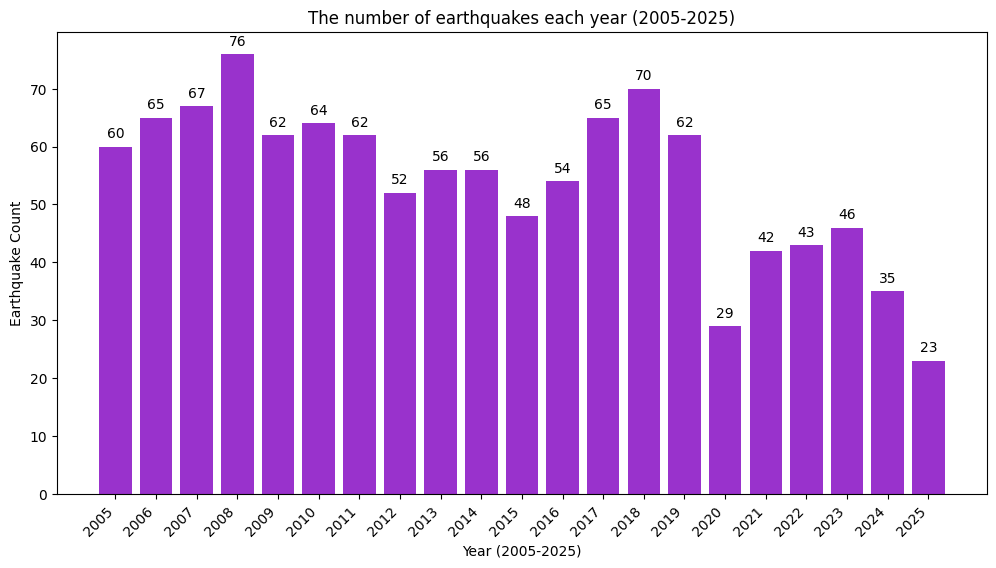

In [17]:
import matplotlib.pyplot as plt
from google.colab import files
even_year_index = even_year.reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(even_year_index['Year'],even_year_index['Mag'],color='darkorchid')
plt.xlabel("Year (2005-2025)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Earthquake Count")
plt.title("The number of earthquakes each year (2005-2025)")
for bar in bars:
    yval = bar.get_height()  # ดึงค่าความสูงของแท่งกราฟ
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2),
             ha='center', va='bottom')


plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

# ดาวน์โหลดไฟล์ที่บันทึกไว้
#files.download('my_plot.png')





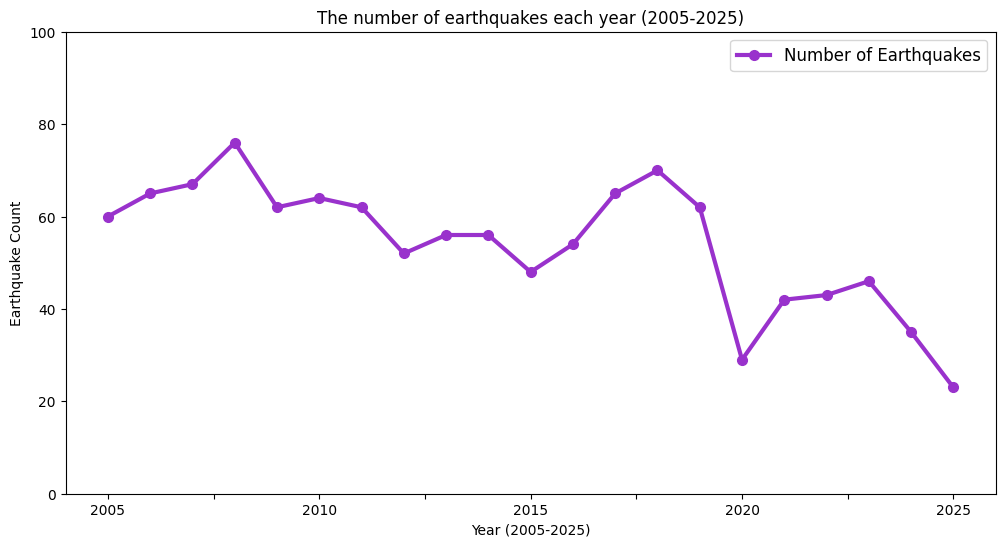

In [18]:


import matplotlib.pyplot as plt
from google.colab import files
even_year_index = even_year.reset_index()
even_year_index.plot(x = "Year", y = "Mag", yticks= range(0, 101, 20),marker='o',
                     figsize=(12,6),color = "darkorchid",linewidth=3,markersize=7,
                     title = "The number of earthquakes each year (2005-2025)",
                     xlabel = "Year (2005-2025)", ylabel = "Earthquake Count")

plt.legend(
          labels=['Number of Earthquakes'],
          loc='upper right',fontsize = 12)


#plt.savefig('Number of earthquakes 2005-2025', dpi=300, bbox_inches='tight')

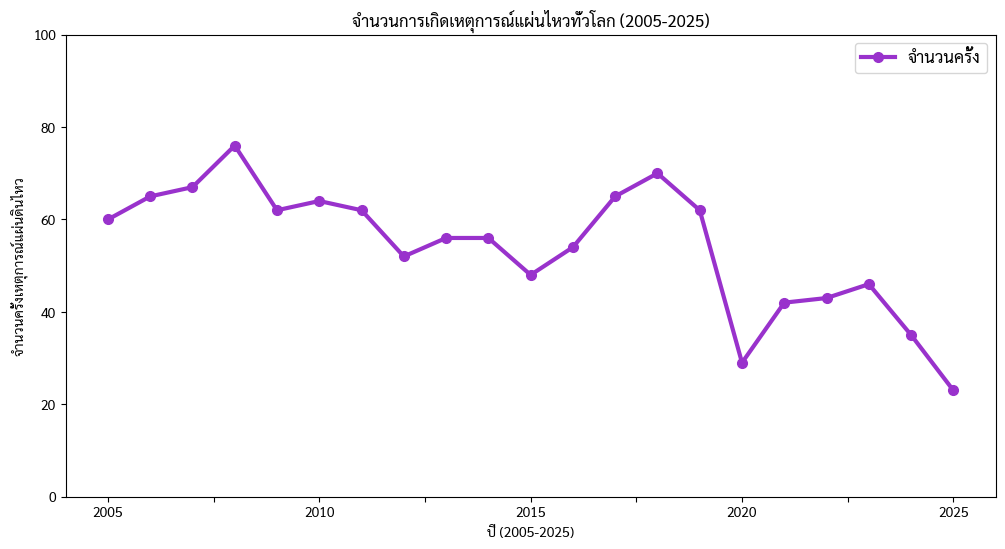

In [19]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.font_manager as fm
fm.fontManager.addfont('Sarabun-Regular.ttf')

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False


import matplotlib.pyplot as plt
from google.colab import files
even_year_index = even_year.reset_index()
even_year_index.plot(x = "Year", y = "Mag", yticks= range(0, 101, 20),marker='o',
                     figsize=(12,6),color = "darkorchid",linewidth=3,markersize=7,
                     title = "จำนวนการเกิดเหตุการณ์แผ่นไหวทั่วโลก (2005-2025)",
                     xlabel = "ปี (2005-2025)", ylabel = "จำนวนครั้งเหตุการณ์แผ่นดินไหว",label = "จำนวนครั้ง")

plt.legend(
          loc='upper right',fontsize = 12)


#plt.savefig('Number of earthquakes 2005-2025', dpi=300, bbox_inches='tight')

In [20]:
even_year_index


,index,Year,Mag
0,0,2005,60
1,1,2006,65
2,2,2007,67
3,3,2008,76
4,4,2009,62
5,5,2010,64
6,6,2011,62
7,7,2012,52
8,8,2013,56
9,9,2014,56


In [21]:
box_plot_year=df.loc[df['Mag'].notna(),["Mag","Year"]]
box_plot_year["Year"]=box_plot_year["Year"].astype(int)

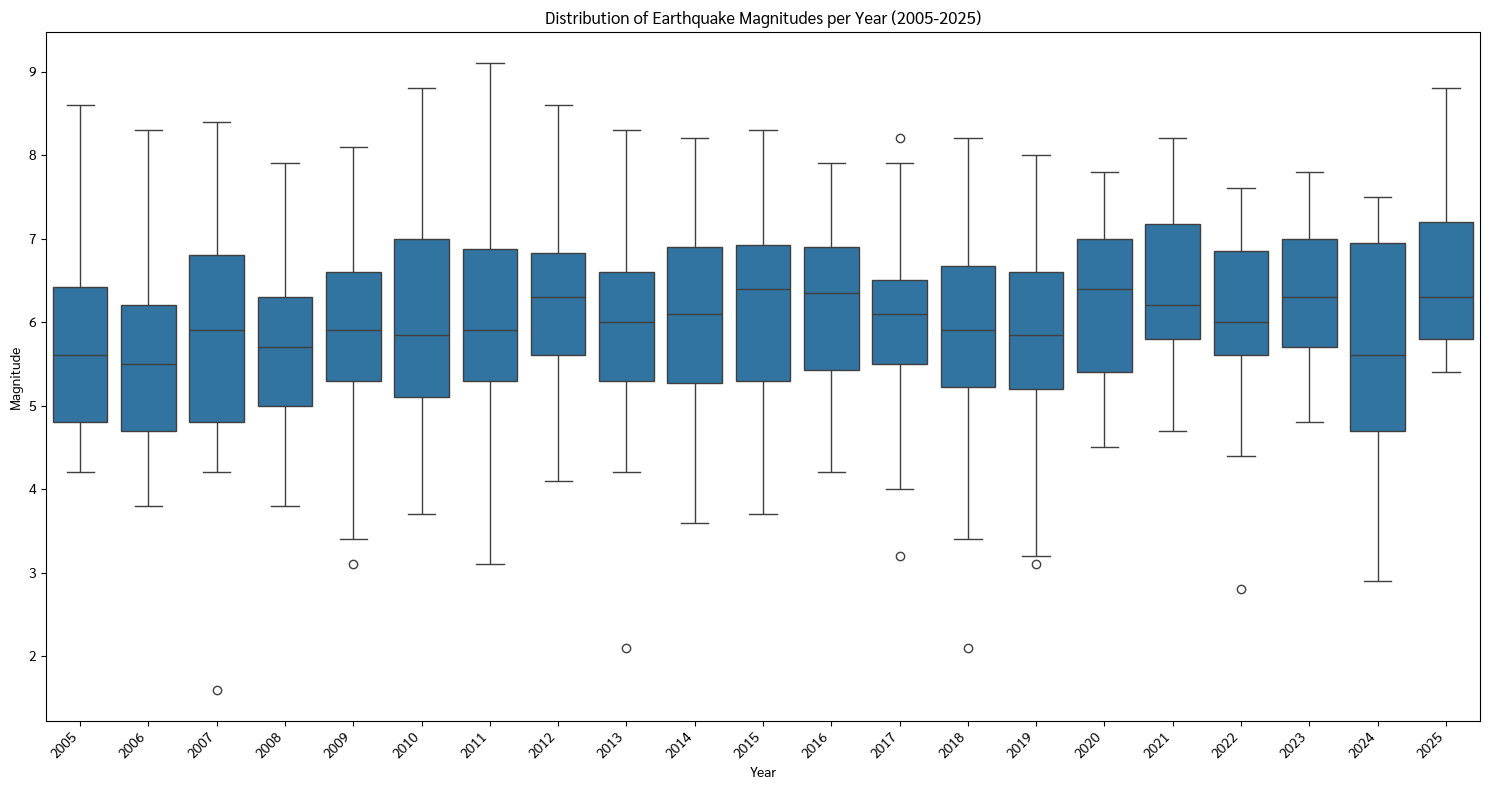

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Ensure Year is treated as a categorical variable for plotting
#df['Year'] = df['Year'].astype('category')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Year', y='Mag', data=box_plot_year)
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Distribution of Earthquake Magnitudes per Year (2005-2025)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('Distribution of Earthquake Magnitudes per Year (2005-2025)', dpi=300, bbox_inches='tight')
# ดาวน์โหลดไฟล์ที่บันทึกไว้
#files.download('Distribution of Earthquake Magnitudes per Year (2005-2025)')

plt.show()

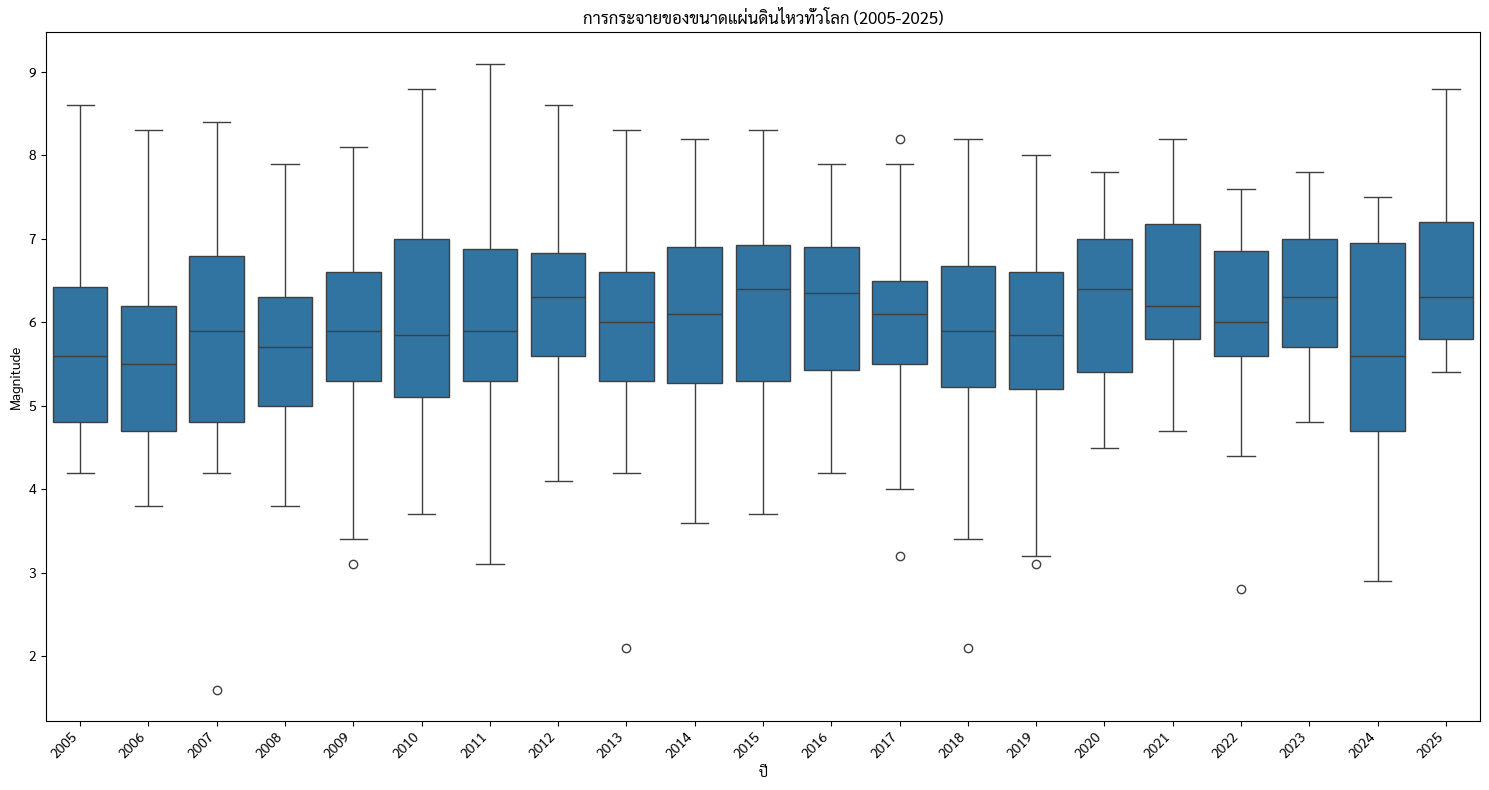

In [23]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.font_manager as fm
fm.fontManager.addfont('Sarabun-Regular.ttf')

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Ensure Year is treated as a categorical variable for plotting
#df['Year'] = df['Year'].astype('category')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Year', y='Mag', data=box_plot_year)
plt.xlabel("ปี")
plt.ylabel("Magnitude")
plt.title("การกระจายของขนาดแผ่นดินไหวทั่วโลก (2005-2025)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('Distribution of Earthquake Magnitudes per Year (2005-2025)', dpi=300, bbox_inches='tight')
# ดาวน์โหลดไฟล์ที่บันทึกไว้
#files.download('Distribution of Earthquake Magnitudes per Year (2005-2025)')

plt.show()

In [24]:
df.drop(0,inplace=True)


In [25]:
group_data = df.groupby('Country')
ttdeath_count = df.groupby('Country')['Total Deaths'].sum()
ttdeath_count = pd.DataFrame(ttdeath_count)
ttdeath_count



,Total Deaths
Country,
AFGHANISTAN,2063.0
ALBANIA,1.0
ALGERIA,14.0
ARGENTINA,4.0
AUSTRALIA,0.0
...,...
VANUATU,14.0
VENEZUELA,7.0
VIETNAM,0.0


In [26]:

damage_country = df.groupby("Country")["Total Damage ($Mil)"].sum()
total_damage

,Total Damage ($Mil)
Country,
COSTA RICA,547.000
PERU,650.000
IRAQ,750.000
THAILAND,1965.600
IRAN,2646.000
ECUADOR,3300.000
TAIWAN,4207.448
CROATIA,5987.000
PAKISTAN,6917.000


In [27]:
df["Country_num"] = df['Country']

event_count_contry = df.groupby("Country")["Country_num"].count()
event_count_contry.sort_values(ascending = False)


,Country_num
Country,
CHINA,124
INDONESIA,120
IRAN,69
JAPAN,61
INDIA,50
...,...
SWITZERLAND,1
UZBEKISTAN,1
UGANDA,1


In [28]:
merged_ttdamage = pd.merge(event_count_contry, total_damage, on='Country', how='left')

In [29]:
merged_ttdamage = merged_ttdamage[merged_ttdamage["Total Damage ($Mil)"].notna()]
merged_ttdamage.head(3)

,Country_num,Total Damage ($Mil)
Country,,
CHILE,27,30905.050
CHINA,124,107100.985
COSTA RICA,4,547.000


In [30]:
merged_ttdamage["ratio event per damage"] = merged_ttdamage["Total Damage ($Mil)"] / merged_ttdamage["Country_num"]


In [31]:
ttdamage_event = merged_ttdamage.sort_values("ratio event per damage",ascending=False).head(15)
ttdamage_event

,Country_num,Total Damage ($Mil),ratio event per damage
Country,,,
JAPAN,61,296388.600,4858.829508
MOROCCO,2,7000.000,3500.000000
CROATIA,2,5987.000,2993.500000
ITALY,12,23633.000,1969.416667
HAITI,5,9675.000,1935.000000
TURKEY,41,49300.000,1202.439024
CHILE,27,30905.050,1144.631481
NEW ZEALAND,25,28450.000,1138.000000
CHINA,124,107100.985,863.717621


In [32]:
ttdamage_event

,Country_num,Total Damage ($Mil),ratio event per damage
Country,,,
JAPAN,61,296388.600,4858.829508
MOROCCO,2,7000.000,3500.000000
CROATIA,2,5987.000,2993.500000
ITALY,12,23633.000,1969.416667
HAITI,5,9675.000,1935.000000
TURKEY,41,49300.000,1202.439024
CHILE,27,30905.050,1144.631481
NEW ZEALAND,25,28450.000,1138.000000
CHINA,124,107100.985,863.717621


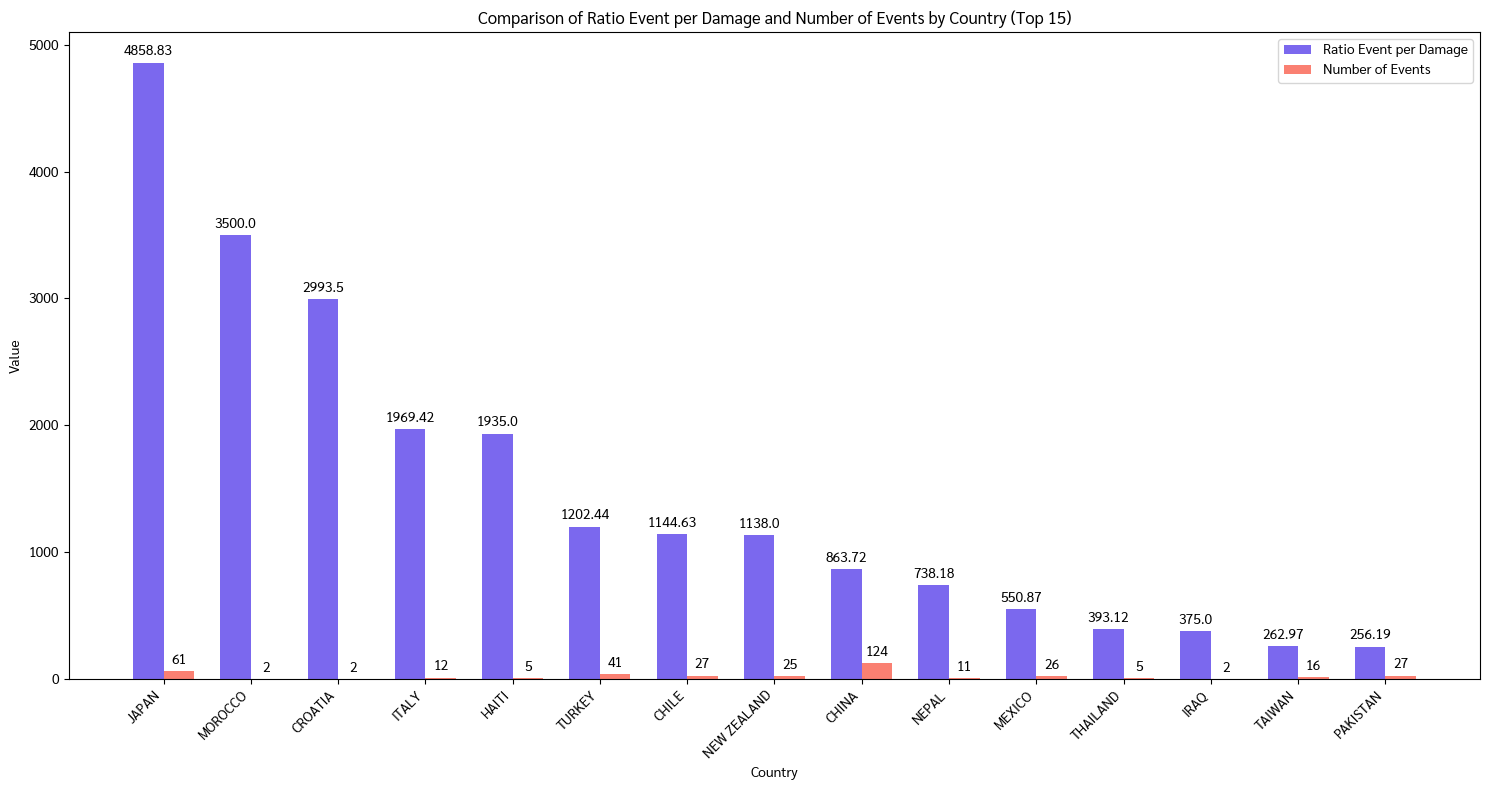

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the index is the country names for plotting
ttdamage_event_indexed = ttdamage_event.reset_index()

labels = ttdamage_event_indexed['Country']
ratio_event_per_damage = ttdamage_event_indexed['ratio event per damage']
country_num = ttdamage_event_indexed['Country_num']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, ratio_event_per_damage, width, label='Ratio Event per Damage', color='mediumslateblue')
rects2 = ax.bar(x + width/2, country_num, width, label='Number of Events', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Comparison of Ratio Event per Damage and Number of Events by Country (Top 15)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

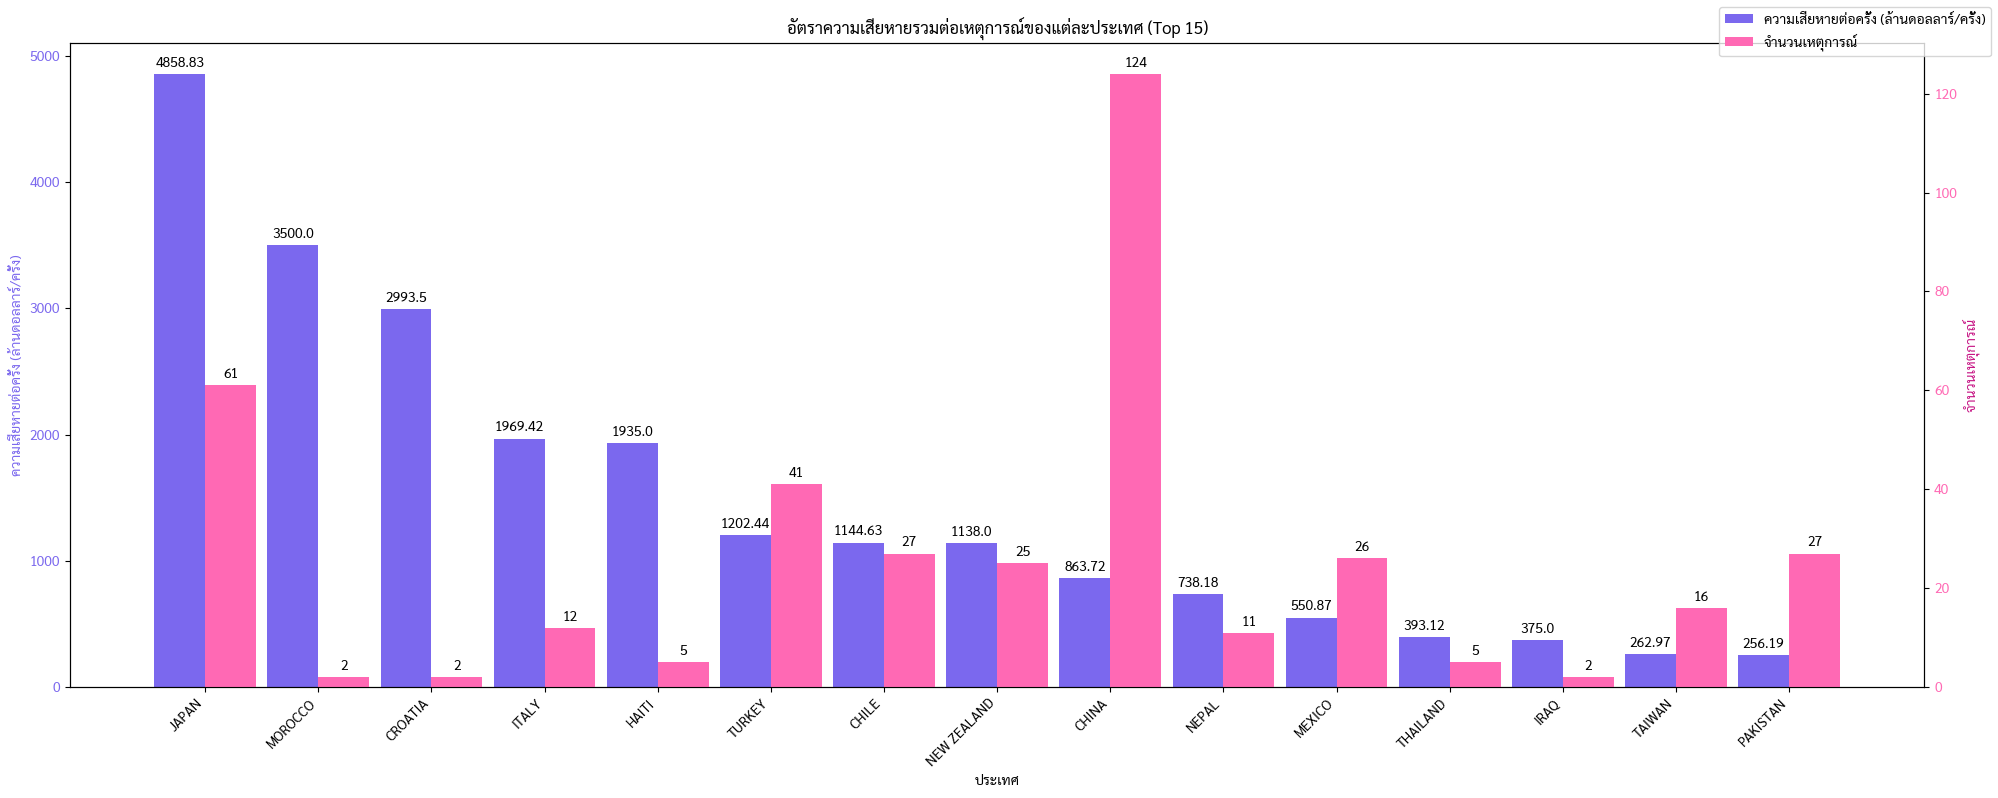

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.font_manager as fm
fm.fontManager.addfont('Sarabun-Regular.ttf')

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False

ttdamage_event_indexed = ttdamage_event.reset_index()

labels = ttdamage_event_indexed['Country']
ratio_event_per_damage = ttdamage_event_indexed['ratio event per damage']
country_num = ttdamage_event_indexed['Country_num']

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot 'Ratio Event per Damage' on the first y-axis
rects1 = ax1.bar(x - width/2, ratio_event_per_damage, width, label='ความเสียหายต่อครั้ง (ล้านดอลลาร์/ครั้ง)', color='mediumslateblue')
ax1.set_xlabel('ประเทศ')
ax1.set_ylabel('ความเสียหายต่อครั้ง (ล้านดอลลาร์/ครั้ง)', color='mediumslateblue')
ax1.tick_params(axis='y', labelcolor='mediumslateblue')

# Create a second y-axis for 'Number of Events'
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, country_num, width, label='จำนวนเหตุการณ์', color='hotpink')
ax2.set_ylabel('จำนวนเหตุการณ์', color='mediumvioletred')
ax2.tick_params(axis='y', labelcolor='hotpink')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Add title
plt.title('อัตราความเสียหายรวมต่อเหตุการณ์ของแต่ละประเทศ (Top 15)')

# Add legends for both axes
fig.legend(loc="upper right")

# Add text labels to the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

fig.tight_layout()
#plt.savefig('Total Damage per Event and Number of Event by Country (Top 15)', dpi=300, bbox_inches='tight')


plt.show()

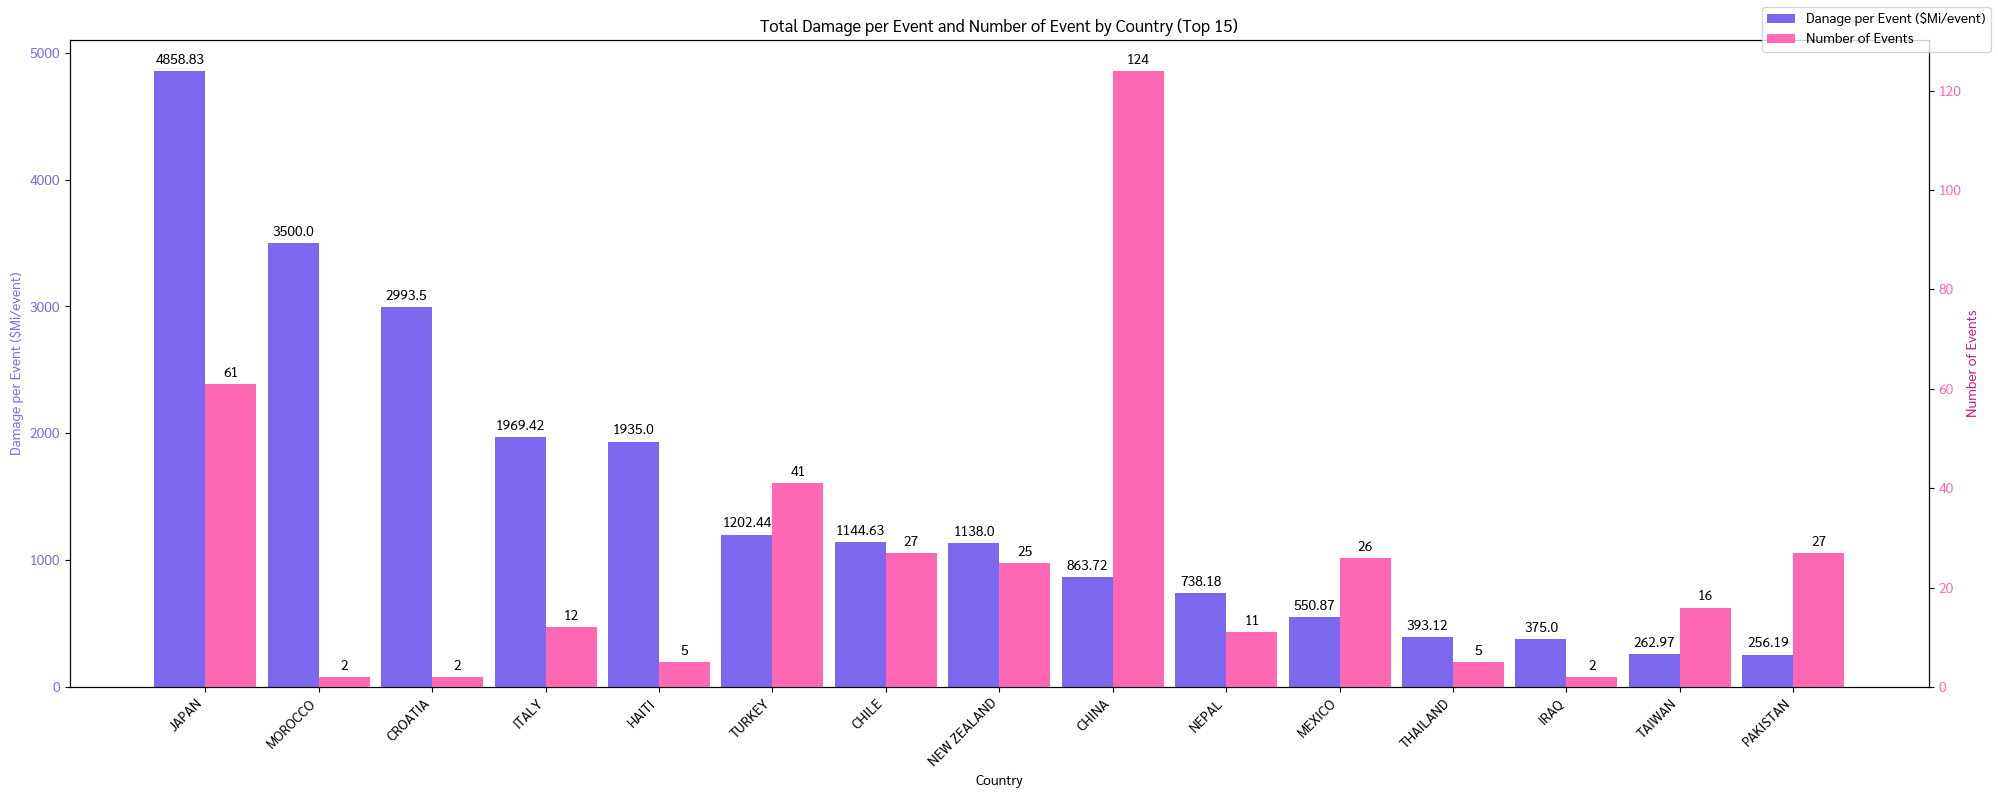

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

ttdamage_event_indexed = ttdamage_event.reset_index()

labels = ttdamage_event_indexed['Country']
ratio_event_per_damage = ttdamage_event_indexed['ratio event per damage']
country_num = ttdamage_event_indexed['Country_num']

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot 'Ratio Event per Damage' on the first y-axis
rects1 = ax1.bar(x - width/2, ratio_event_per_damage, width, label='Danage per Event ($Mi/event)', color='mediumslateblue')
ax1.set_xlabel('Country')
ax1.set_ylabel('Damage per Event ($Mi/event)', color='mediumslateblue')
ax1.tick_params(axis='y', labelcolor='mediumslateblue')

# Create a second y-axis for 'Number of Events'
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, country_num, width, label='Number of Events', color='hotpink')
ax2.set_ylabel('Number of Events', color='mediumvioletred')
ax2.tick_params(axis='y', labelcolor='hotpink')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Add title
plt.title('Total Damage per Event and Number of Event by Country (Top 15)')

# Add legends for both axes
fig.legend(loc="upper right")

# Add text labels to the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

fig.tight_layout()
#plt.savefig('Total Damage per Event and Number of Event by Country (Top 15)', dpi=300, bbox_inches='tight')


plt.show()

### API country area


In [36]:
import requests
Country = []
area = []
Country = []
for i in ttdeath_count.index :
    url = f'https://restcountries.com/v3.1/name/{i}'
    data = requests.get(url)
    result = data.json()
# Access the first element of the list
    result_country = result[0]
    area_country = result_country['area']
    Country.append(i)
    area.append(area_country)


In [37]:
count_area = pd.DataFrame({
    "Country": Country,
    "area": area})
count_area

,Country,area
0,AFGHANISTAN,652230.0
1,ALBANIA,28748.0
2,ALGERIA,2381741.0
3,ARGENTINA,2780400.0
4,AUSTRALIA,7692024.0
...,...,...
80,VANUATU,12189.0
81,VENEZUELA,916445.0
82,VIETNAM,331212.0
83,ZAMBIA,752612.0


In [38]:
data_ttdamage = pd.merge(event_count_contry, total_damage, on='Country', how='left')
data_ttdamage = data_ttdamage[data_ttdamage["Total Damage ($Mil)"].notna()]
data_ttdamage = pd.merge(data_ttdamage,count_area,on="Country",how = "left")
data_ttdamage.loc[data_ttdamage["Country"].str.contains("CHINA", na=False), "area"] = 9706961
data_ttdamage["ratio event per damage"] = data_ttdamage["Total Damage ($Mil)"]/data_ttdamage["Country_num"]
#data_ttdamage.sort_values("ratio event per damage",ascending=False)
data_ttdamage["ratio damage per area"] = data_ttdamage["Total Damage ($Mil)"]/data_ttdamage["area"]
data_ttdamage["ratio damage per area"] = data_ttdamage["ratio damage per area"]*1000
data_ttdamage = data_ttdamage.sort_values("ratio damage per area",ascending=False)

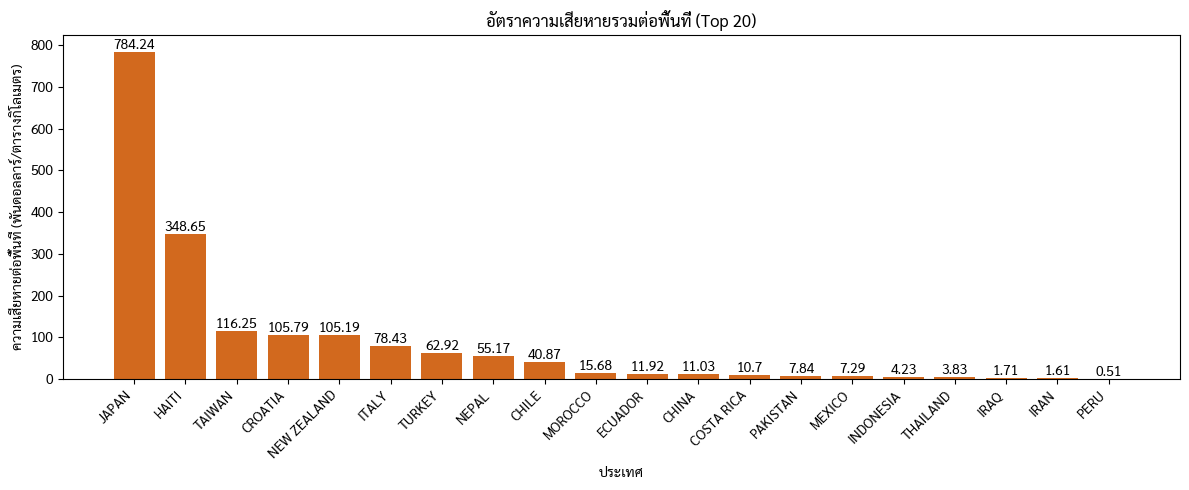

In [39]:
import matplotlib.pyplot as plt
from google.colab import files
data_ttdamage_index = data_ttdamage.reset_index()
plt.figure(figsize=(12, 5))
bars = plt.bar(data_ttdamage_index['Country'],data_ttdamage_index['ratio damage per area'],color='chocolate')
plt.xlabel("ประเทศ")
plt.xticks(rotation=45, ha='right')
plt.ylabel("ความเสียหายต่อพื้นที่ (พันดอลลาร์/ตารางกิโลเมตร)")
plt.title("อัตราความเสียหายรวมต่อพื้นที่ (Top 20)")
for bar in bars:
    yval = bar.get_height()  # ดึงค่าความสูงของแท่งกราฟ
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), # Adjusted y-position
             ha='center', va='bottom')

plt.tight_layout()
#plt.savefig('Total Damage per Area by Country (Top 20)', dpi=300, bbox_inches='tight')

plt.show()

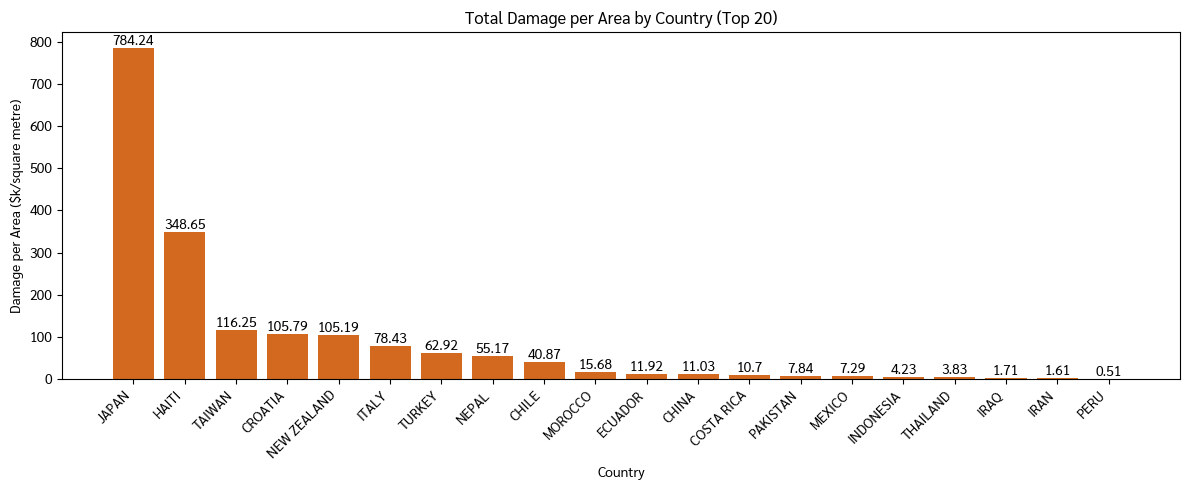

In [40]:
import matplotlib.pyplot as plt
from google.colab import files
data_ttdamage_index = data_ttdamage.reset_index()
plt.figure(figsize=(12, 5))
bars = plt.bar(data_ttdamage_index['Country'],data_ttdamage_index['ratio damage per area'],color='chocolate')
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Damage per Area ($k/square metre)")
plt.title("Total Damage per Area by Country (Top 20)")
for bar in bars:
    yval = bar.get_height()  # ดึงค่าความสูงของแท่งกราฟ
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), # Adjusted y-position
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Total Damage per Area by Country (Top 20)', dpi=300, bbox_inches='tight')

plt.show()

In [41]:
data_ttdamage.sort_values("area",ascending=False)

,Country,Country_num,Total Damage ($Mil),area,ratio event per damage,ratio damage per area
1,CHINA,124,107100.985,9706961.0,863.717621,11.033421
11,MEXICO,26,14322.500,1964375.0,550.865385,7.291123
6,INDONESIA,120,8060.490,1904569.0,67.170750,4.232186
7,IRAN,69,2646.000,1648195.0,38.347826,1.605393
16,PERU,42,650.000,1285216.0,15.476190,0.505752
15,PAKISTAN,27,6917.000,881912.0,256.185185,7.843186
19,TURKEY,41,49300.000,783562.0,1202.439024,62.917804
0,CHILE,27,30905.050,756102.0,1144.631481,40.874181
18,THAILAND,5,1965.600,513120.0,393.120000,3.830683
12,MOROCCO,2,7000.000,446550.0,3500.000000,15.675736


## Insight Traffy BKK

In [42]:
import pandas as pd
url = "https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/traffy_bkk.csv"
df = pd.read_csv(url, encoding='tis-620')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION_ID            11789 non-null  object 
 1   LAT                    11789 non-null  float64
 2   LON                    11789 non-null  float64
 3   DATE_D                 11789 non-null  object 
 4   TIME_T                 11789 non-null  object 
 5   HOUR_                  11789 non-null  float64
 6   MINUTE_                11789 non-null  float64
 7   SECOND_                11789 non-null  float64
 8   PROVINCE               11789 non-null  object 
 9   DISTRICT               11779 non-null  object 
 10  SUB_DISTRICT           11779 non-null  object 
 11  District-Sub_district  11789 non-null  object 
 12  DESCRIPTION            11789 non-null  object 
 13  BLDG_T                 11789 non-null  object 
 14  UP_DMG                 11790 non-null  int64  
 15  WA

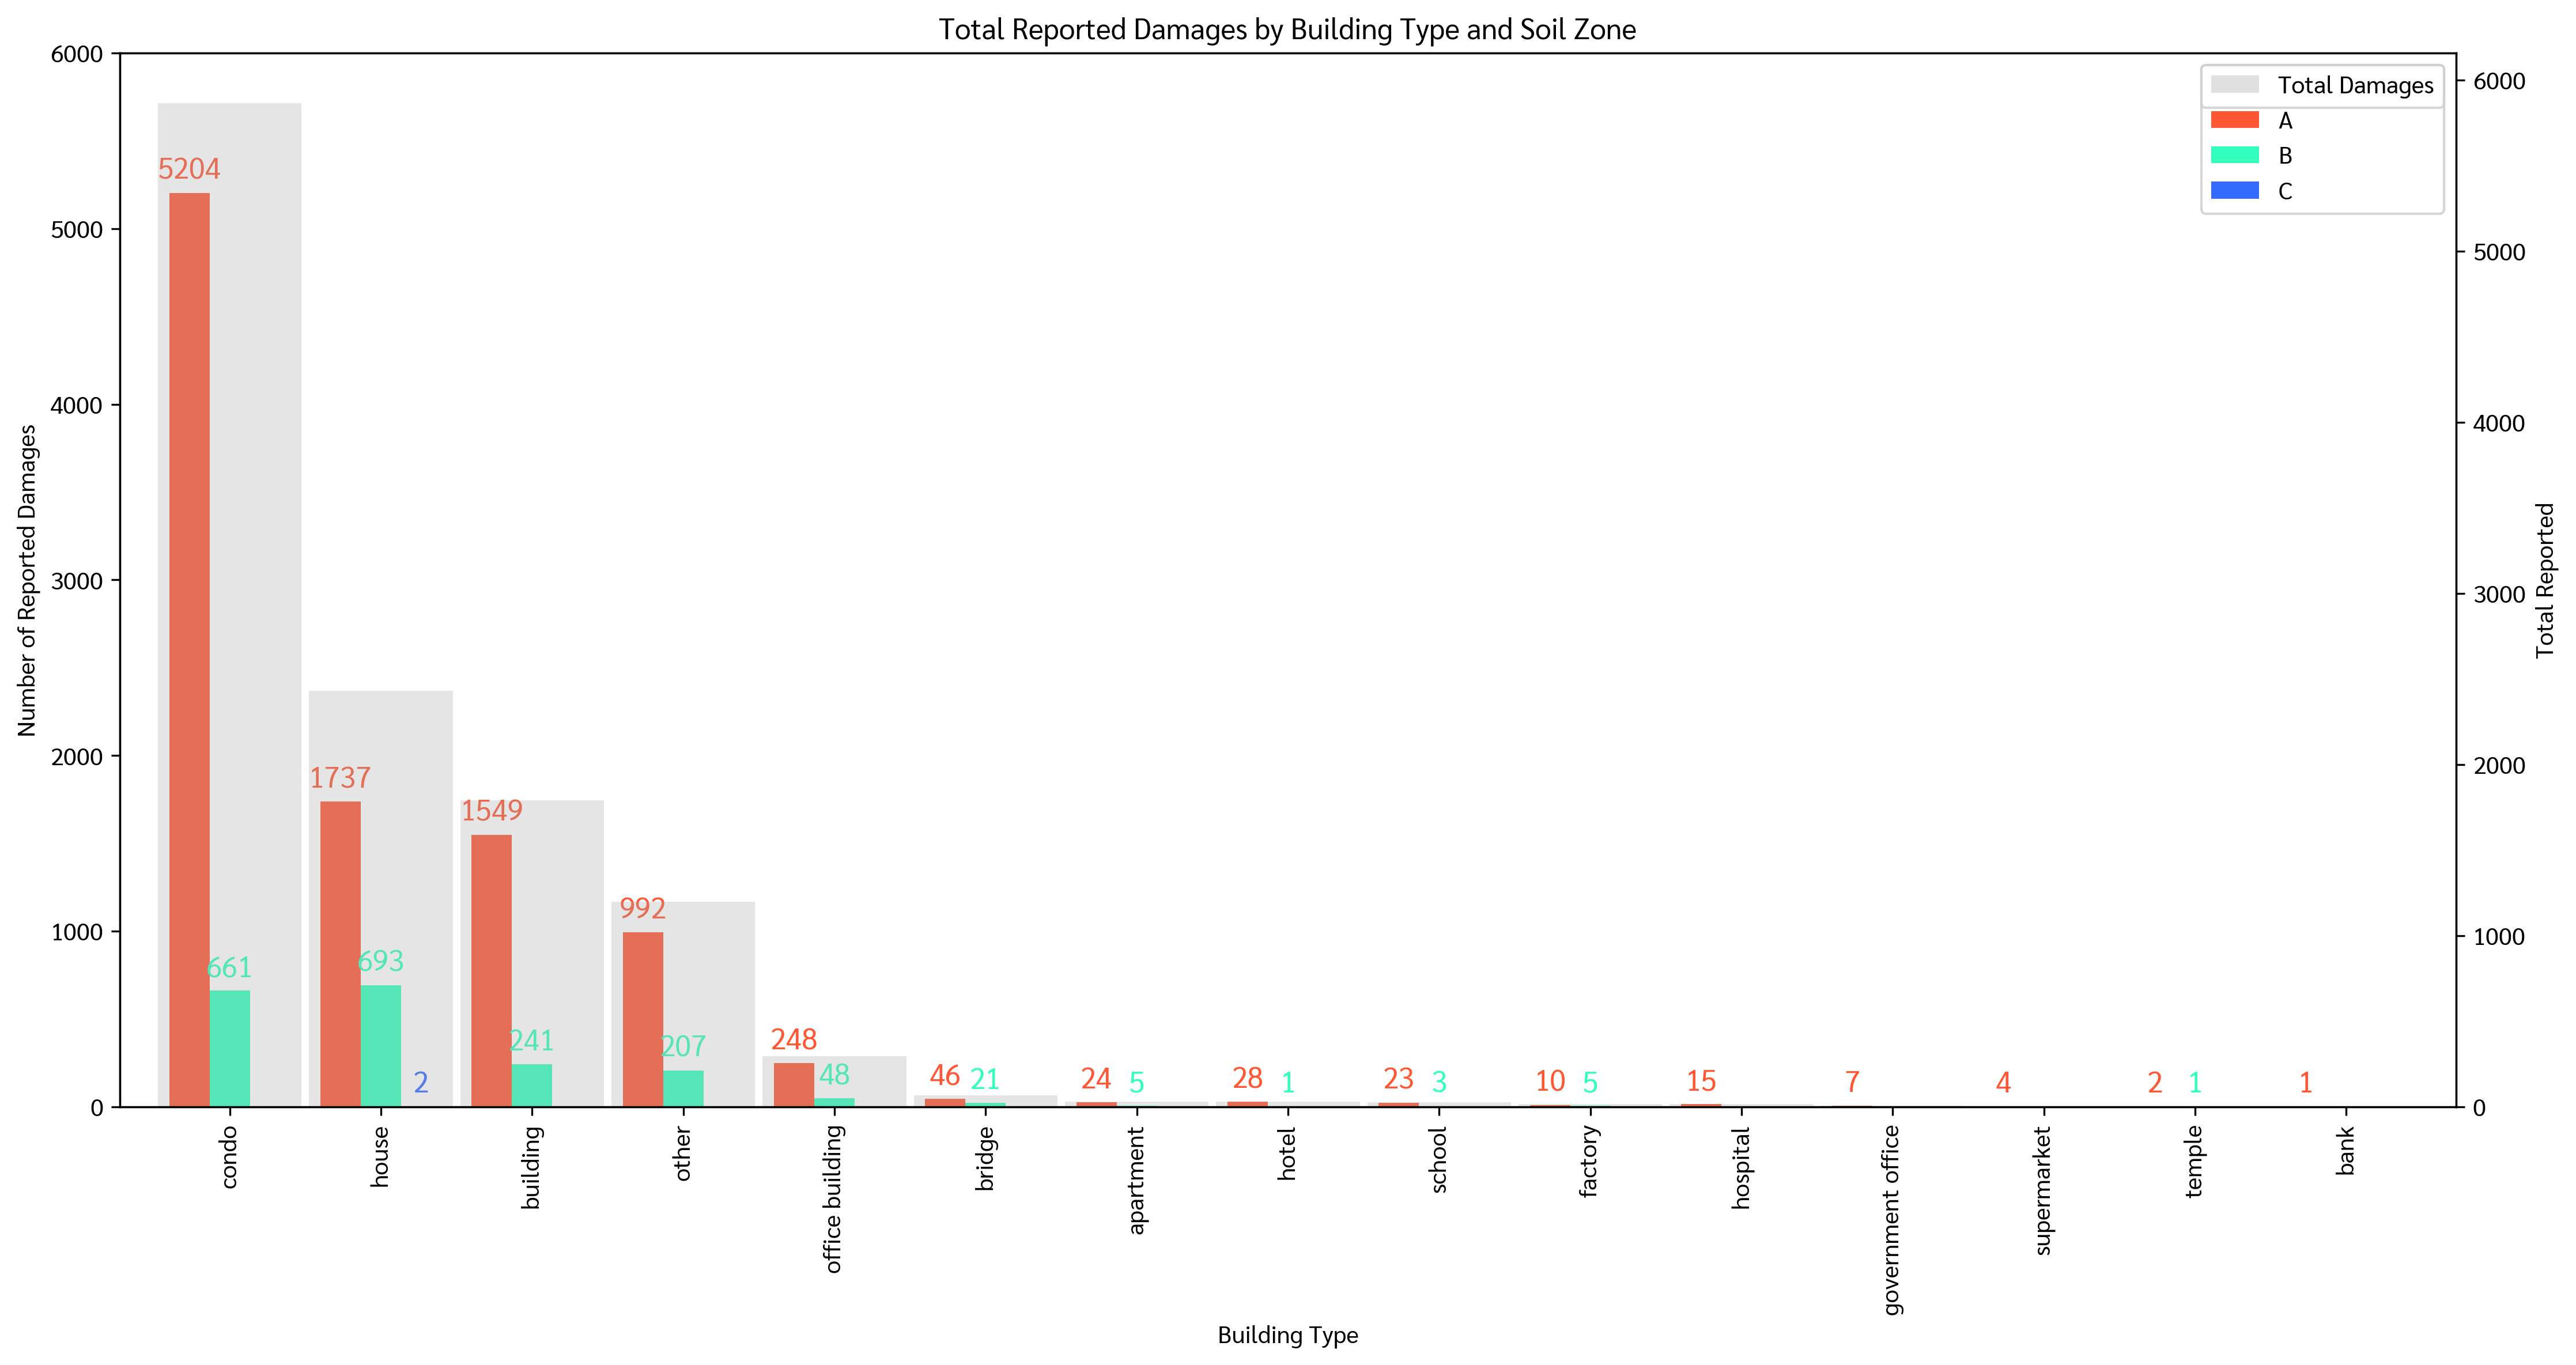

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/traffy_bkk.csv"
df = pd.read_csv(url, encoding='tis-620')

df = df[:-1]


pivot_building_zone = pd.pivot_table(df, index='BLDG_T', columns='Zoning', aggfunc='size', fill_value=0)
pivot_building_zone["sum_building"] = pivot_building_zone[["A", "B", "C"]].sum(axis=1)
data_building_zone = pivot_building_zone.sort_values(['sum_building'], ascending=False)
data_building_zone_reset = data_building_zone.reset_index()


fig, ax1 = plt.subplots(figsize=(15, 8),dpi = 300)


colors = ['#FF5733', '#33FFBD', '#336BFF']
data_building_zone_reset.plot(x="BLDG_T", y=["A", "B", "C"], kind='bar', ax=ax1, color=colors, width=0.8, zorder=1) # Added zorder for the first bars
ax1.set_ylabel("Number of Reported Damages")
ax1.set_xlabel("Building Type")
ax1.set_title("Total Reported Damages by Building Type and Soil Zone")
ax1.set_yticks(range(0, 6001, 1000))


for i, container in enumerate(ax1.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', fontsize=12, color=colors[i])

ax2 = ax1.twinx()


data_building_zone_reset.plot(x="BLDG_T", y="sum_building", kind='bar', ax=ax2, color='darkgray', label='Total Damages', alpha=0.3, zorder=2,width = 0.95) # Added alpha and zorder for the second bars
ax2.set_ylabel("Total Reported")
ax2.set_yticks(range(0, 6001, 1000))

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles2 + handles1, labels=labels2 + labels1)

plt.xlabel("Building Type")

plt.tight_layout()
#plt.savefig('Total Reported Damages by Building Type and Soil Layer2', dpi=300, bbox_inches='tight')
plt.show()


Text(0.95, 0.7, 'condo and house \n account for 70%.')

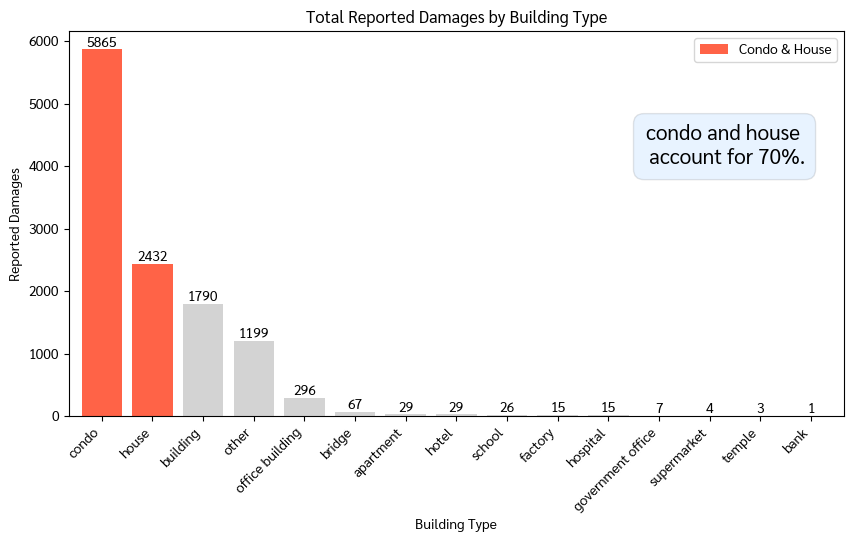

In [44]:
colors = ['tomato' if bldg in ['condo', 'house'] else 'lightgray' for bldg in data_building_zone_reset['BLDG_T']]
ax = data_building_zone_reset.plot(kind = "bar", x = "BLDG_T" , y = "sum_building", figsize = (10,5),width = 0.8 , color = colors)
ax.bar_label(ax.containers[0])
ax.set_title("Total Reported Damages by Building Type")
ax.set_ylabel("Reported Damages")
ax.set_xlabel("Building Type")
plt.xticks(rotation=45, ha='right')
ax.legend(["Condo & House"],

          loc='upper right')
ax.text(0.95, 0.7, 'condo and house \n account for 70%.',
        transform=ax.transAxes,
        ha='right',  # Horizontal alignment
        va = 'center',    # Vertical alignment
        fontsize=15,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='dodgerblue', alpha=0.1))
#plt.savefig('Total Reported Damages by Building Type1', dpi=300, bbox_inches='tight')

Text(0.95, 0.7, 'condo and house \n account for 70%.')

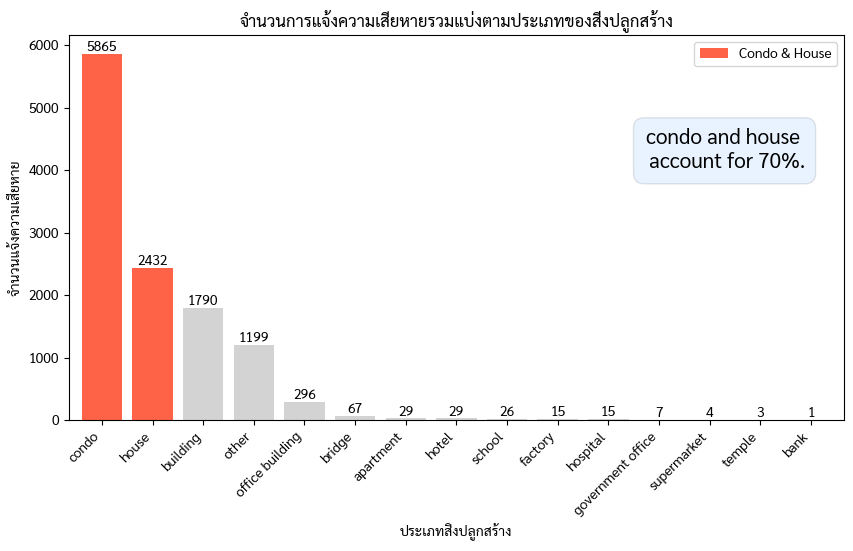

In [45]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.font_manager as fm
fm.fontManager.addfont('Sarabun-Regular.ttf')

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False

colors = ['tomato' if bldg in ['condo', 'house'] else 'lightgray' for bldg in data_building_zone_reset['BLDG_T']]
ax = data_building_zone_reset.plot(kind = "bar", x = "BLDG_T" , y = "sum_building", figsize = (10,5),width = 0.8 , color = colors)
ax.bar_label(ax.containers[0])
ax.set_title("จำนวนการแจ้งความเสียหายรวมแบ่งตามประเภทของสิ่งปลูกสร้าง")
ax.set_ylabel("จำนวนแจ้งความเสียหาย")
ax.set_xlabel("ประเภทสิ่งปลูกสร้าง")
plt.xticks(rotation=45, ha='right')
ax.legend(["Condo & House"],

          loc='upper right')
ax.text(0.95, 0.7, 'condo and house \n account for 70%.',
        transform=ax.transAxes,
        ha='right',  # Horizontal alignment
        va = 'center',    # Vertical alignment
        fontsize=15,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='dodgerblue', alpha=0.1))
#plt.savefig('Total Reported Damages by Building Type1', dpi=300, bbox_inches='tight')

In [46]:
pivot_building_area = pd.pivot_table(df,index = "BLDG_T", columns= "ผังสี", aggfunc="size")
#pivot_building_zone = pd.pivot_table(df, index='BLDG_T', columns='Zoning', aggfunc='size')
pivot_building_area=pivot_building_area.fillna(0)
pivot_building_area["sum_building"] = pivot_building_area.sum(axis=1)

pivot_building_area = pivot_building_area.sort_values('sum_building',ascending=False)
new_names = {
    "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง": 'Orange',
    "สีแดง : พาณิชยกรรม": 'Red',
    "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก": 'Brown',
    "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย": 'Yellow',
    "สีเขียว : ชนบทและเกษตร": 'Green',
    "สีขาว : อนุรักษ์ชนบทและเกษตร": 'White',
    "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย": 'Light Brown',
    "สีม่วง : อุตสาหกรรม": 'Purple',
    "สีเม็ดมะปราง : คลัง": 'Plum',
    "สถานที่ราชการ": 'Government',
    "พื้นที่ทหาร": 'Military',
    "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้": 'Restricted'
}
pivot_building_area=pivot_building_area.rename(columns=new_names)
data_building_area_reset = pivot_building_area.reset_index()
data_building_area_reset

ผังสี,BLDG_T,Military,Restricted,Government,White,Brown,Light Brown,Purple,Orange,Green,Plum,Yellow,Red,sum_building
0,condo,19.0,2.0,119.0,5.0,2153.0,6.0,7.0,1297.0,12.0,0.0,573.0,1668.0,5861.0
1,house,3.0,3.0,5.0,113.0,408.0,22.0,2.0,620.0,97.0,0.0,907.0,252.0,2432.0
2,building,14.0,0.0,47.0,6.0,553.0,13.0,6.0,369.0,15.0,0.0,286.0,479.0,1788.0
3,other,4.0,0.0,25.0,23.0,311.0,8.0,1.0,271.0,26.0,0.0,241.0,287.0,1197.0
4,office building,0.0,0.0,11.0,0.0,71.0,3.0,3.0,68.0,3.0,1.0,56.0,80.0,296.0
5,bridge,0.0,0.0,4.0,3.0,6.0,1.0,0.0,13.0,2.0,0.0,21.0,15.0,65.0
6,apartment,3.0,0.0,3.0,0.0,7.0,0.0,0.0,8.0,0.0,0.0,2.0,6.0,29.0
7,hotel,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,29.0
8,school,0.0,0.0,1.0,1.0,6.0,1.0,0.0,9.0,0.0,0.0,4.0,4.0,26.0
9,factory,0.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,15.0


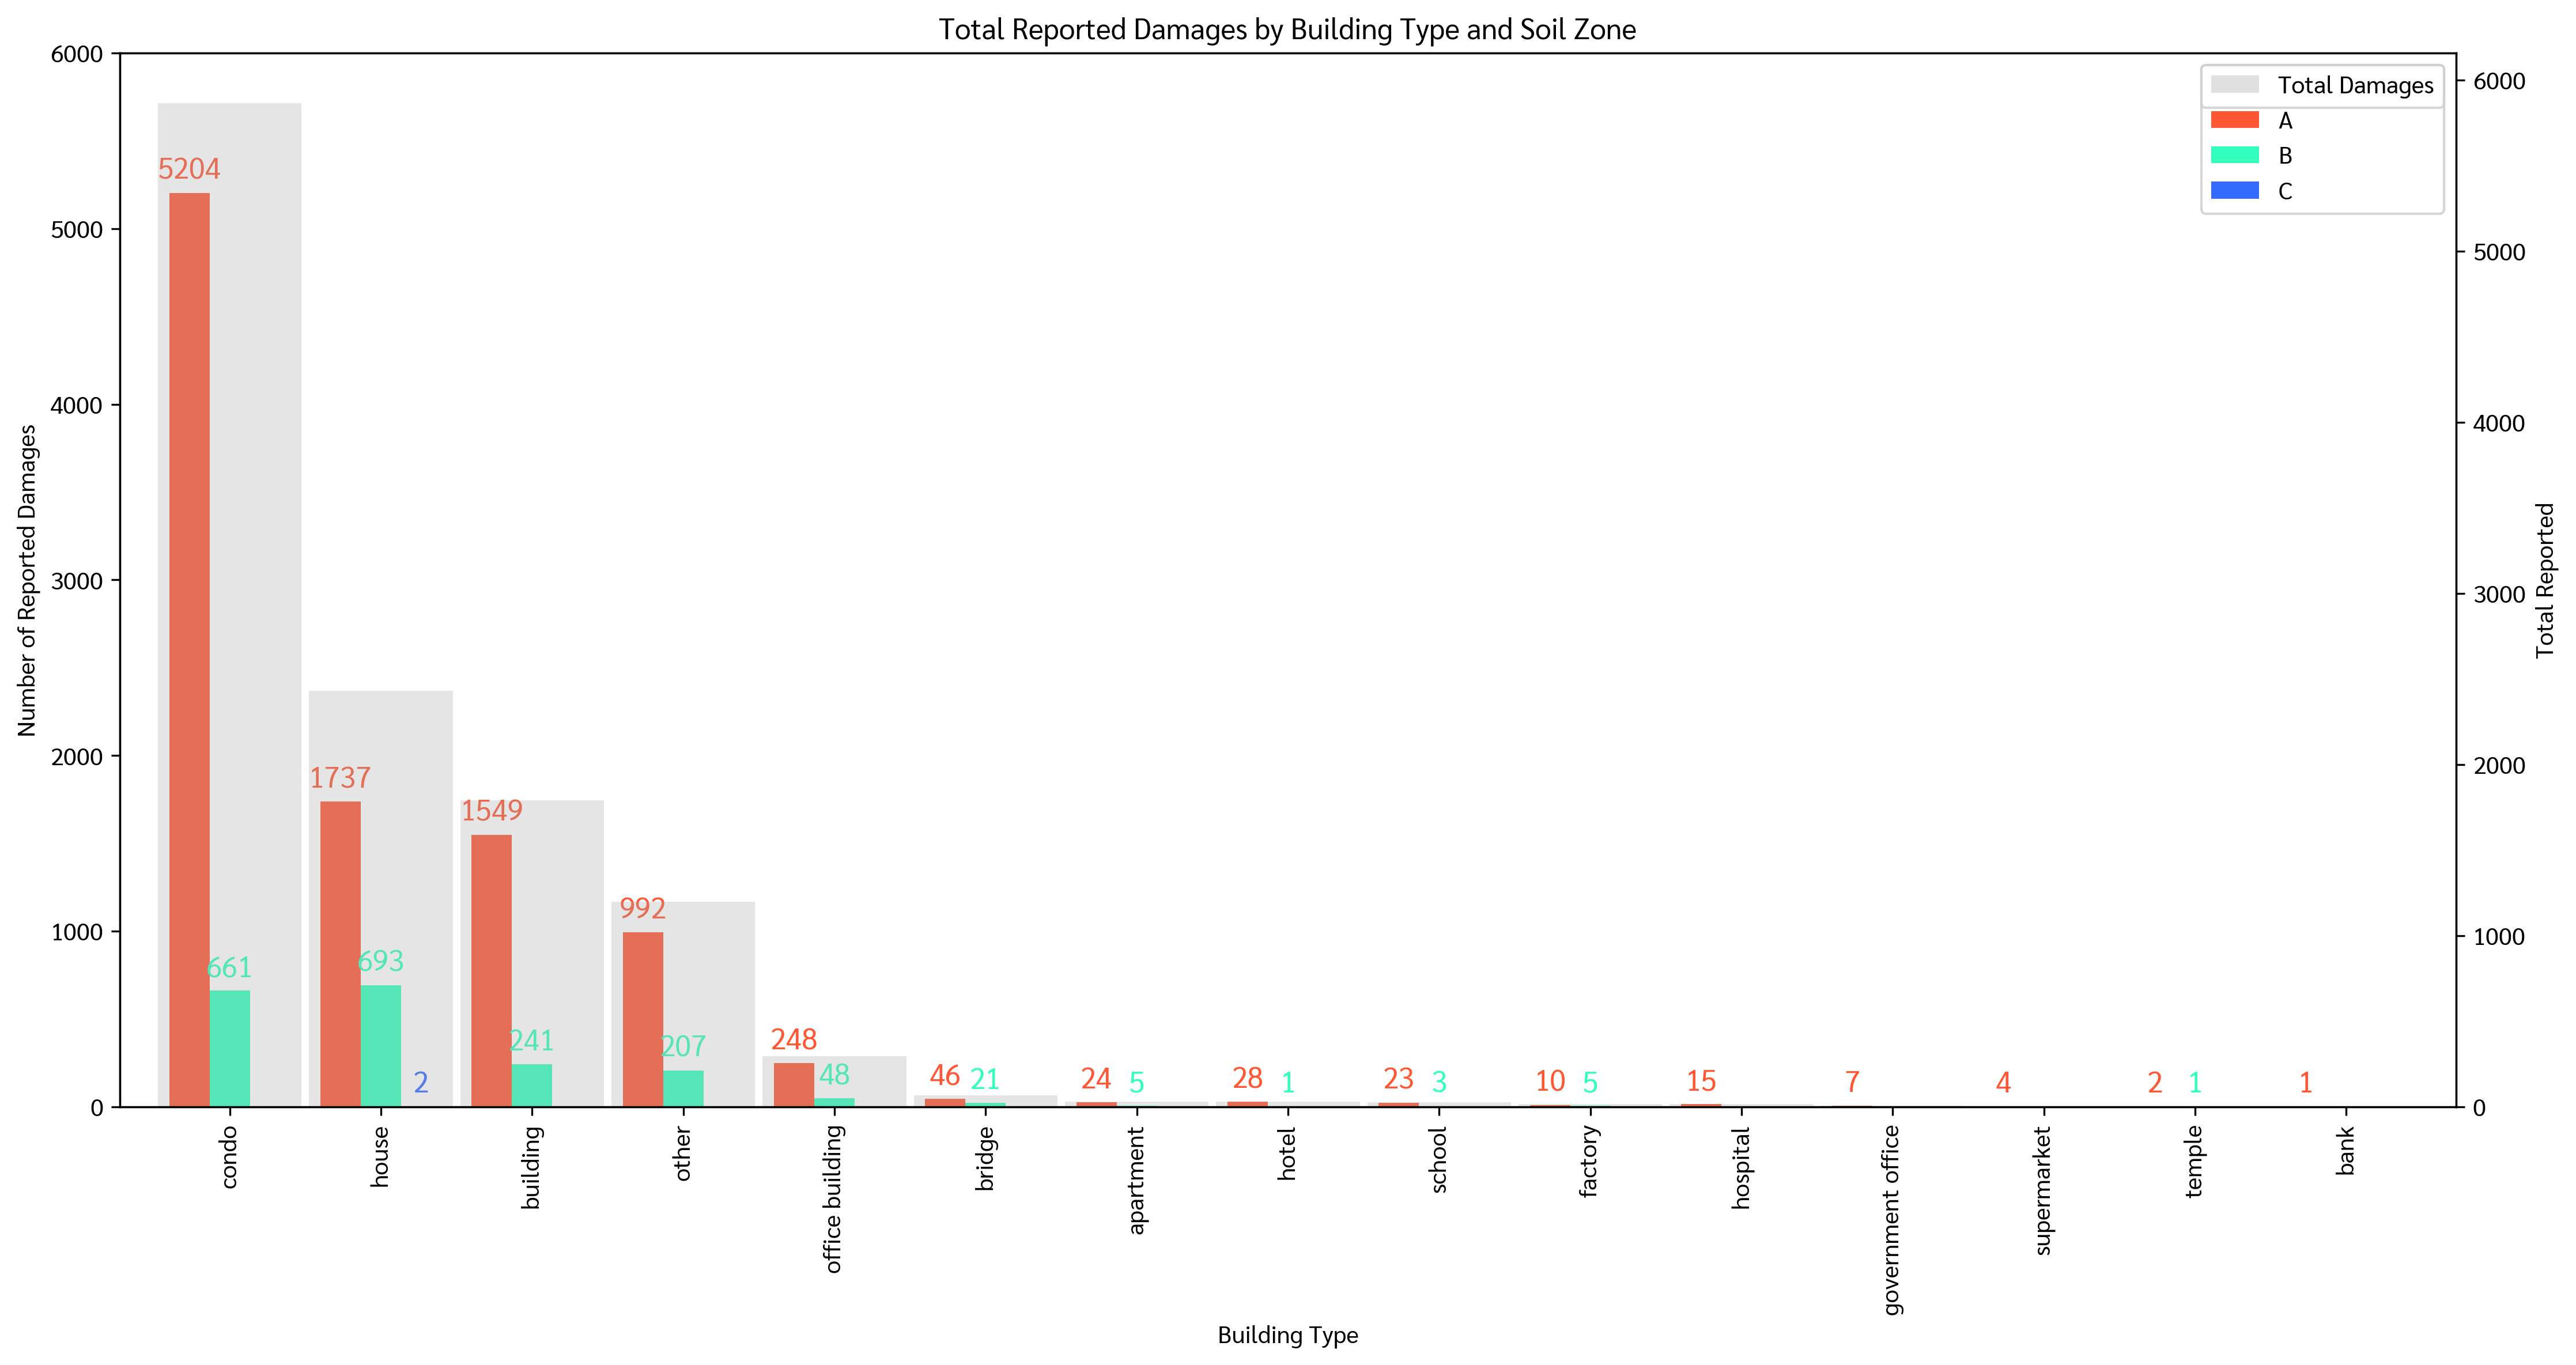

In [47]:
fig, ax1 = plt.subplots(figsize=(15, 8),dpi = 300)


colors = ['#FF5733', '#33FFBD', '#336BFF']
data_building_zone_reset.plot(x="BLDG_T", y=["A", "B", "C"], kind='bar', ax=ax1, color=colors, width=0.8, zorder=1) # Added zorder for the first bars
ax1.set_ylabel("Number of Reported Damages")
ax1.set_xlabel("Building Type")
ax1.set_title("Total Reported Damages by Building Type and Soil Zone")
ax1.set_yticks(range(0, 6001, 1000))


for i, container in enumerate(ax1.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', fontsize=12, color=colors[i])

ax2 = ax1.twinx()


data_building_zone_reset.plot(x="BLDG_T", y="sum_building", kind='bar', ax=ax2, color='darkgray', label='Total Damages', alpha=0.3, zorder=2,width = 0.95) # Added alpha and zorder for the second bars
ax2.set_ylabel("Total Reported")
ax2.set_yticks(range(0, 6001, 1000))

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles2 + handles1, labels=labels2 + labels1)

plt.xlabel("Building Type")

plt.tight_layout()
#plt.savefig('Total Reported Damages by Building Type and Soil Layer2', dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Number of Verified No-Damage Reports')

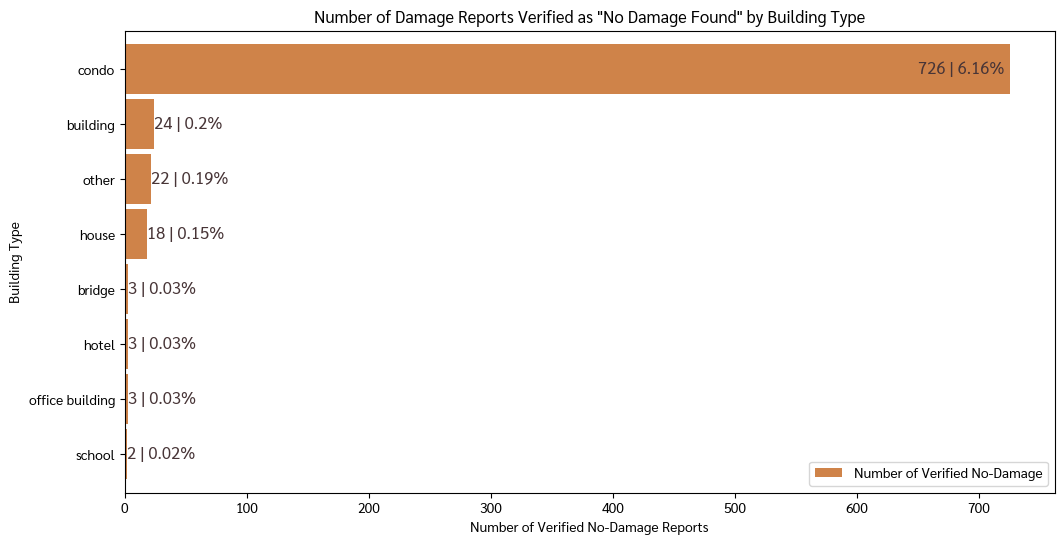

In [48]:
no_dmg = df[df["TOTAL_DMG"] == 0].pivot_table(df,index = "BLDG_T",aggfunc = "size").sort_values(ascending= False)
no_dmg_reset = no_dmg.reset_index()
no_dmg_reset = no_dmg_reset.rename(columns={0:"count"})
sum_total = df["BLDG_T"].count()
no_dmg_reset["p_no"] = round( (no_dmg_reset["count"]/sum_total)*100,2)
no_dmg_reset["proportion"]=no_dmg_reset['count'].astype(str)+" | "+no_dmg_reset['p_no'].astype(str)+"%"
no_dmg_reset = no_dmg_reset.sort_values("p_no",ascending=True)

ax =  no_dmg_reset.plot(kind = "barh" , x = "BLDG_T", y = "count" , figsize = (12,6),color = "#cf8349", width = 0.9)

max_value = no_dmg_reset['count'].max()

for i, bar in enumerate(ax.patches):
    # Use bar.get_width() for horizontal bar plots
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2

    if xval == max_value:
        # Place text inside the bar
        plt.text(xval - 5, yval, no_dmg_reset['proportion'].iloc[i], ha='right', va='center', fontsize=12, color='#483537')
    else:
        # Place text outside the bar
        plt.text(xval, yval, no_dmg_reset['proportion'].iloc[i], ha='left', va='center', fontsize=12, color='#483537')

    # You had an empty string, so I've used 'proportion' as a placeholder
    # assuming that's the data you wanted to show
    #plt.text(xval, yval, no_dmg_reset['proportion'].iloc[i], ha='left', va='center', fontsize=9, color='black')
    #print(i, bar)
ax.legend(["Number of Verified No-Damage"],
          loc='lower right')
ax.set_title('Number of Damage Reports Verified as "No Damage Found" by Building Type')
ax.set_ylabel("Building Type")
ax.set_xlabel("Number of Verified No-Damage Reports")
#plt.savefig('Number of Damage Reports Verified as "No Damage Found" by Building Type', dpi=300, bbox_inches='tight')


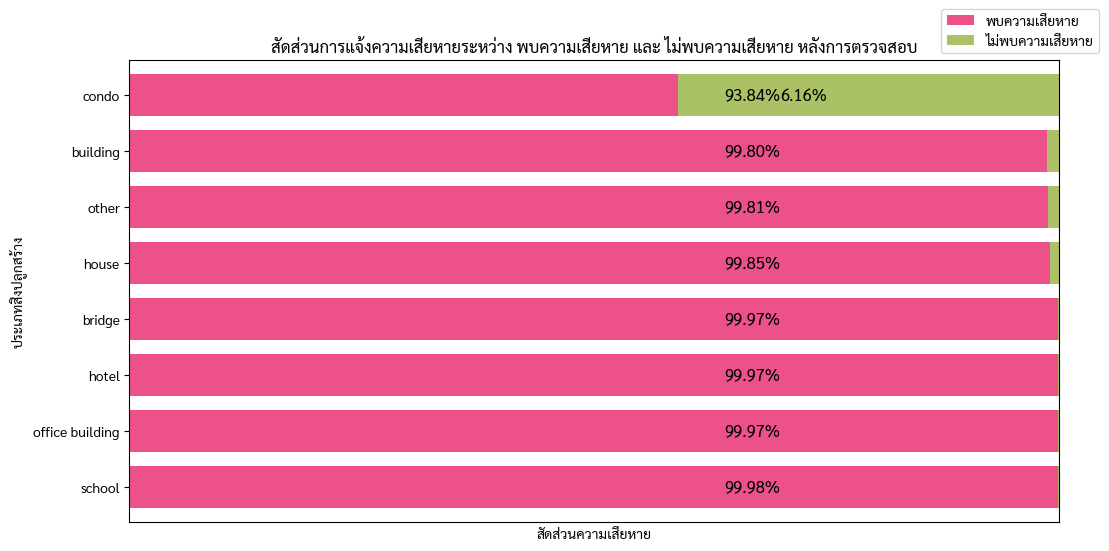

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False


no_dmg_reset["p_yes"]=100-no_dmg_reset["p_no"]
no_dmg_plot =no_dmg_reset[["BLDG_T","p_yes","p_no"]].plot(kind = "barh",x = 'BLDG_T',
                                             stacked= True,xlim = (85,100),
                                             ylabel = "ประเภทสิ่งปลูกสร้าง",
                                             xlabel = "สัดส่วนความเสียหาย", figsize = (12,6),width = 0.75,color = ["#ec518a","#abc165"],
                                            title = "สัดส่วนการแจ้งความเสียหายระหว่าง พบความเสียหาย และ ไม่พบความเสียหาย หลังการตรวจสอบ")
no_dmg_plot.set_xticks([])
#plt.xticks(range(85, 101, 10))
plt.legend(loc = ('lower right'),bbox_to_anchor=(1.05, 1.0),labels = ["พบความเสียหาย", "ไม่พบความเสียหาย"])


for i, bar in enumerate(no_dmg_plot.containers[1].patches):
    value = no_dmg_reset['p_no'].iloc[i]

    if value > 1:

        x_pos = 95.5 # กำหนดตำแหน่ง X ให้อยู่ทางซ้ายสุดของขอบเขต
        y_pos = bar.get_y() + bar.get_height() / 2

        no_dmg_plot.text(
            x_pos, y_pos,
            f'{value:.2f}%',
            ha='left', # จัดชิดซ้าย
            va='center',
            color='black', # เปลี่ยนสีเพื่อให้เห็นบนพื้นหลังสีอ่อน
            fontsize=12,
            fontweight = "bold"
        )

for i, bar in enumerate(no_dmg_plot.containers[0].patches):
    value = no_dmg_reset['p_yes'].iloc[i]

    y_pos = bar.get_y() + bar.get_height() / 2

    no_dmg_plot.text(
        x_pos, y_pos,
        f'{value:.2f}%',
        ha='right',
        va='center',
        color='black',
        fontsize=12,

    )


(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

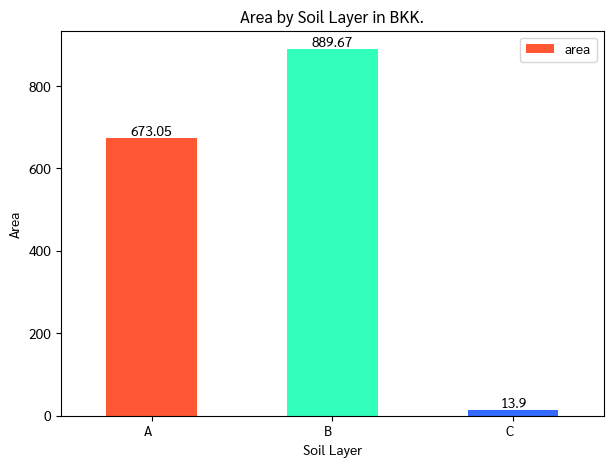

In [50]:
url = "https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/Soil%20Horizons.csv"
data_soil = pd.read_csv(url)
data_soil["area"] = round(data_soil["area_m2"]/1000000,2)
#data_soil = data_soil.sort_values("area_m2",ascending= False)
colors = ['#FF5733', '#33FFBD', '#336BFF']
ax = data_soil.plot(x = "Zoning", y = "area",kind="bar", xlabel="Soil Layer" , ylabel = "Area" ,
               figsize = (7,5), title= "Area by Soil Layer in BKK.", color = colors)

ax.bar_label(ax.containers[0],fontsize=10)
plt.xticks(rotation=0, ha='right')
#plt.savefig('Area by Soil Layer in BKK', dpi=300, bbox_inches='tight')



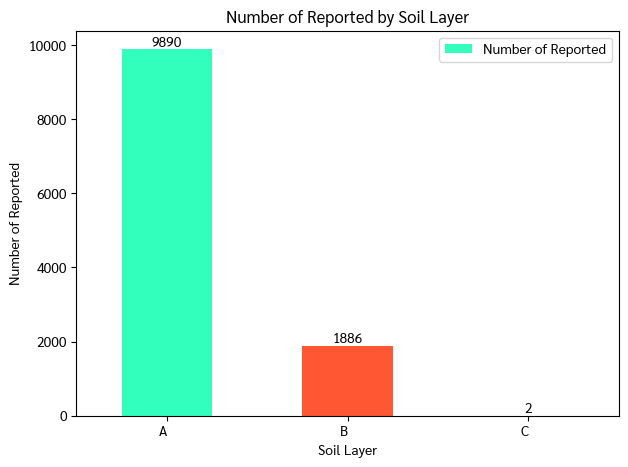

In [51]:
data_soil_report = df.pivot_table(index = "Zoning",aggfunc = "size")
data_soil_report_reset = data_soil_report.reset_index()
data_soil_report_reset=data_soil_report_reset.rename(columns={0:"report"})
colors = [ '#33FFBD','#FF5733', '#336BFF']
ax=data_soil_report_reset.plot(kind = "bar",x = "Zoning", y = "report" , xlabel = "Soil Layer" ,
                               ylabel = "Number of Reported", figsize = (7,5), title="Number of Reported by Soil Layer",
                    color = colors)
plt.xticks(rotation=0, ha='right')
ax.bar_label(ax.containers[0],fontsize=10)
ax.legend(["Number of Reported"],
          loc='upper right')
#plt.savefig('Number of Reported by Soil Layer', dpi=300, bbox_inches='tight')

In [52]:
data_soil_report_reset.rename(columns={0:"report"})

,Zoning,report
0,A,9890
1,B,1886
2,C,2


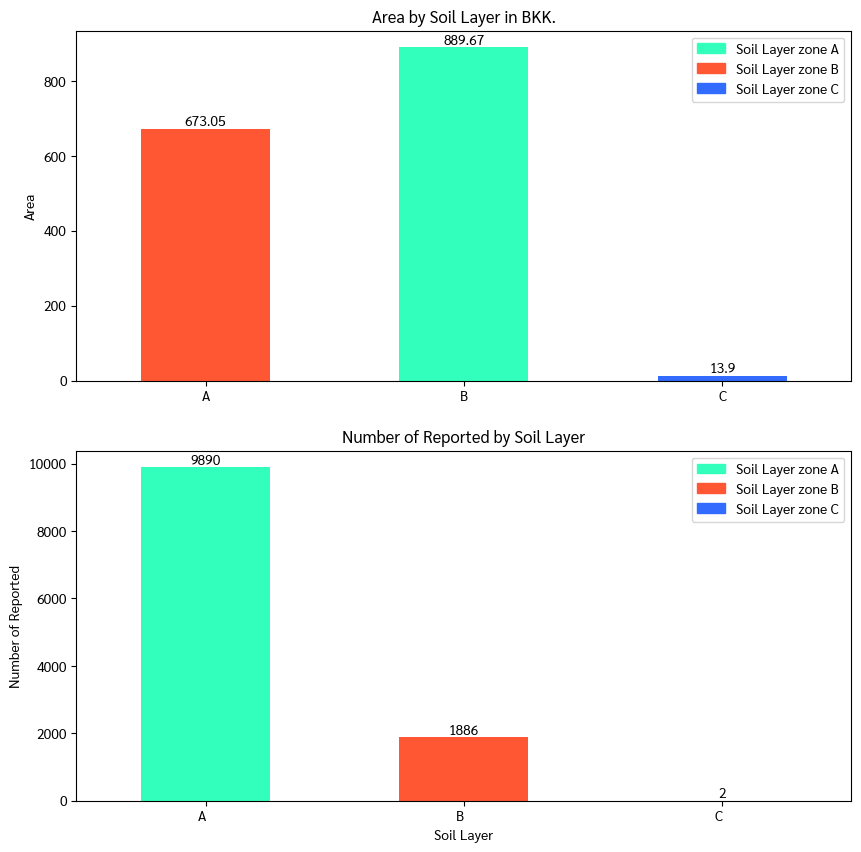

In [53]:
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
fig, (ax, ax1) = plt.subplots(nrows=2, figsize=(10, 10))
colors = ['#FF5733', '#33FFBD', '#336BFF']
ax = data_soil.plot(x = "Zoning", y = "area",kind="bar", xlabel="" , ylabel = "Area" ,
               ax = ax,title= "Area by Soil Layer in BKK.", color = colors)

ax.bar_label(ax.containers[0],fontsize=10)
ax.tick_params(axis='x', rotation=0)
ax.legend(["Area (million sq m)"],
          loc='upper right')
colors = [ '#33FFBD','#FF5733', '#336BFF']
ax1=data_soil_report_reset.plot(kind = "bar",x = "Zoning", y = "report" , xlabel = "Soil Layer" ,
                               ylabel = "Number of Reported", title="Number of Reported by Soil Layer",
                               color = colors , ax = ax1)
plt.xticks(rotation=0, ha='right')
legend_patches_ax = [
    mpatches.Patch(color=colors[0], label='Soil Layer zone A'),
    mpatches.Patch(color=colors[1], label='Soil Layer zone B'),
    mpatches.Patch(color=colors[2], label='Soil Layer zone C')
]
ax.legend(handles=legend_patches_ax, loc='upper right')
ax1.bar_label(ax1.containers[0],fontsize=10)
ax1.legend(["Number of Reported"],
          loc='upper right')

legend_patches_ax1 = [
    mpatches.Patch(color=colors[0], label='Soil Layer zone A'),
    mpatches.Patch(color=colors[1], label='Soil Layer zone B'),
    mpatches.Patch(color=colors[2], label='Soil Layer zone C')
]
ax1.legend(handles=legend_patches_ax1, loc='upper right')
#plt.savefig('Area and Number of Reported', dpi=300, bbox_inches='tight')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11789 entries, 0 to 11788
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION_ID            11789 non-null  object 
 1   LAT                    11789 non-null  float64
 2   LON                    11789 non-null  float64
 3   DATE_D                 11789 non-null  object 
 4   TIME_T                 11789 non-null  object 
 5   HOUR_                  11789 non-null  float64
 6   MINUTE_                11789 non-null  float64
 7   SECOND_                11789 non-null  float64
 8   PROVINCE               11789 non-null  object 
 9   DISTRICT               11779 non-null  object 
 10  SUB_DISTRICT           11779 non-null  object 
 11  District-Sub_district  11789 non-null  object 
 12  DESCRIPTION            11789 non-null  object 
 13  BLDG_T                 11789 non-null  object 
 14  UP_DMG                 11789 non-null  int64  
 15  WA

In [55]:
total_up_dmg = df["UP_DMG"].sum(axis=0)
total_floor_dmg = df["FLOOR_DMG"].sum(axis=0)
total_structure_dmg = df["STRUCTURE_DMG"].sum(axis=0)
total_pillar_dmg = df["PILLAR_DMG"].sum(axis=0)
total_wall_dmg = df["WALL_DMG"].sum(axis=0)
strc_dmg = pd.DataFrame({"Damage Type":["Wall Damage","Pillar Damage","Sturcture Damage","Floor Damage","Up Damage"],
                         "Damage count":[total_wall_dmg,total_pillar_dmg,total_structure_dmg,total_floor_dmg,total_up_dmg],


})
strc_dmg = strc_dmg.sort_values("Damage count",ascending=True)

In [56]:
strc_dmg

,Damage Type,Damage count
4,Up Damage,530
3,Floor Damage,562
2,Sturcture Damage,750
1,Pillar Damage,903
0,Wall Damage,1320


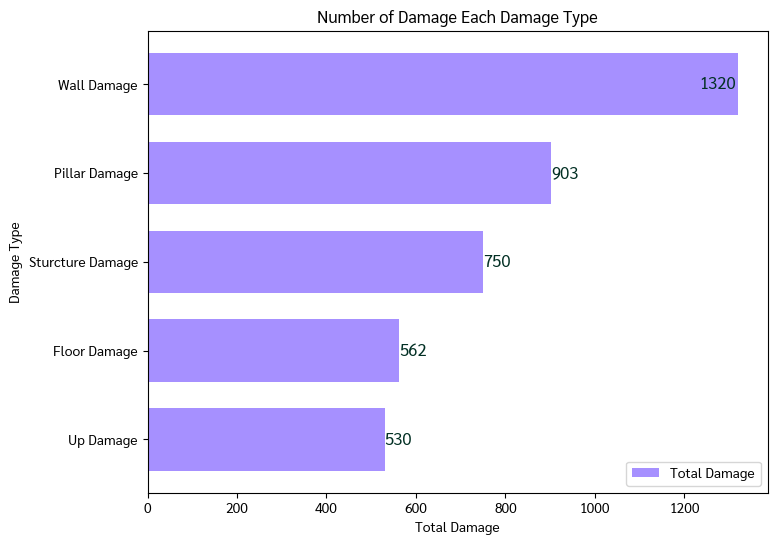

In [57]:
ax = strc_dmg.plot(kind = "barh" , x = "Damage Type", xlabel="Total Damage",ylabel = "Damage Type", figsize=(8,6),title="Number of Damage Each Damage Type",color = "#a690ff",width = 0.7)
plt.xticks(rotation = 0)
#ax.bar_label(ax.containers[0],fontsize=12)
ax.legend(["Total Damage"])
max_value = strc_dmg['Damage count'].max()

for i, bar in enumerate(ax.patches):
    # Use bar.get_width() for horizontal bar plots
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2

    if xval == max_value:
        # Place text inside the bar
        plt.text(xval - 5, yval, strc_dmg['Damage count'].iloc[i], ha='right', va='center', fontsize=12, color='#023024')
    else:
        # Place text outside the bar
        plt.text(xval, yval, strc_dmg['Damage count'].iloc[i], ha='left', va='center', fontsize=12, color='#023024')
#plt.savefig('Number of Damage Each Damage Type', dpi=300, bbox_inches='tight')

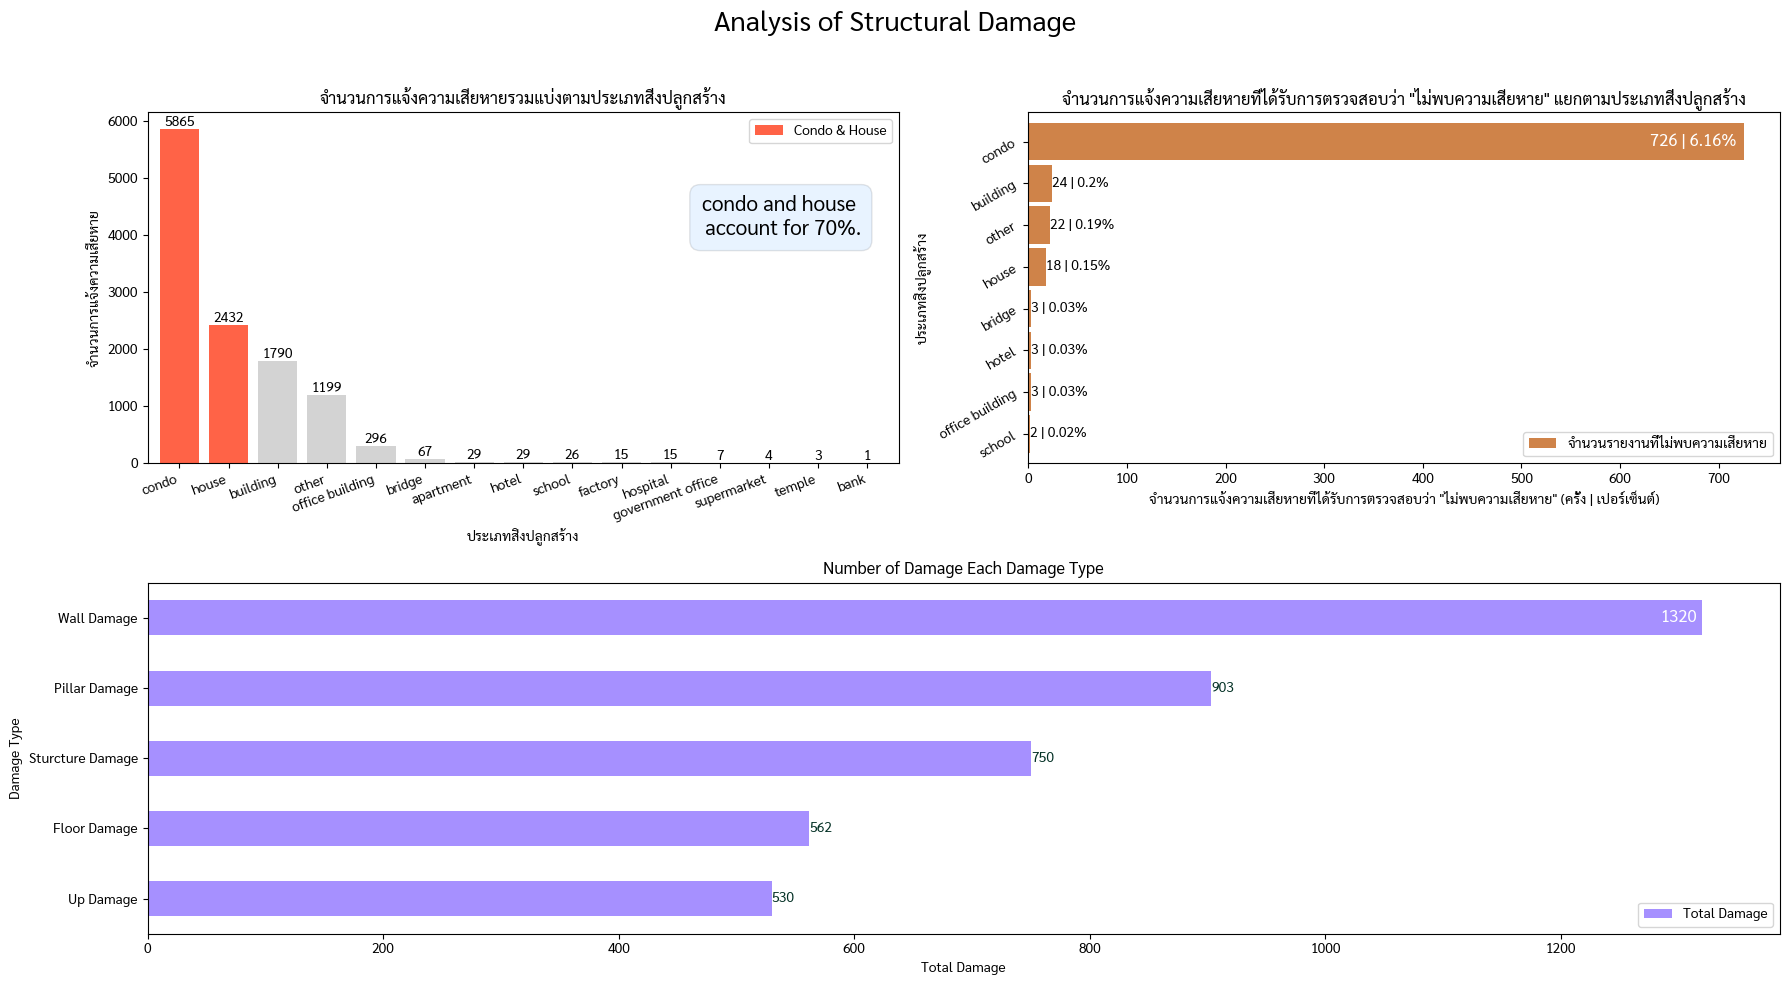

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False


# สร้าง figure และ axes สำหรับ 3 กราฟ โดยใช้ GridSpec
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2) # กำหนดขนาด Grid เป็น 2 แถว 2 คอลัมน์

# กำหนดตำแหน่งของแต่ละ subplot
ax1 = fig.add_subplot(gs[0, 0]) # กราฟที่ 1: แถวที่ 0, คอลัมน์ที่ 0
ax2 = fig.add_subplot(gs[0, 1]) # กราฟที่ 2: แถวที่ 0, คอลัมน์ที่ 1
ax3 = fig.add_subplot(gs[1, :]) # กราฟที่ 3: แถวที่ 1, ใช้ทั้ง 2 คอลัมน์
## set ax1
colors = ['tomato' if bldg in ['condo', 'house'] else 'lightgray' for bldg in data_building_zone_reset['BLDG_T']]
ax = data_building_zone_reset.plot(kind = "bar", x = "BLDG_T" , y = "sum_building",ax=ax1,width = 0.8 , color = colors)
ax.bar_label(ax.containers[0])
ax.set_title("จำนวนการแจ้งความเสียหายรวมแบ่งตามประเภทสิ่งปลูกสร้าง")
ax.set_ylabel("จำนวนการแจ้งความเสียหาย")
ax.set_xlabel("ประเภทสิ่งปลูกสร้าง")
#ax1.set_xticks(ax1.get_xticks()) # Use set_xticks on the Axes object
ax1.set_xticklabels(data_building_zone_reset['BLDG_T'], rotation=20, ha='right')


ax.legend(["Condo & House"],

          loc='upper right')
ax.text(0.95, 0.7, 'condo and house \n account for 70%.',
        transform=ax.transAxes,
        ha='right',  # Horizontal alignment
        va = 'center',    # Vertical alignment
        fontsize=15,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='dodgerblue', alpha=0.1))

no_dmg_reset.plot(kind = "barh" , x = "BLDG_T", y = "count",color = "#cf8349", width = 0.9, ax = ax2)
ax2.set_yticklabels(no_dmg_reset['BLDG_T'], rotation=30, ha='right')
max_value = no_dmg_reset['count'].max()
for i, bar in enumerate(ax2.patches):
    # Use bar.get_width() for horizontal bar plots
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2

    if xval == max_value:
        # Place text inside the bar
        #ax2.text(xval - 5, yval, no_dmg_reset['proportion'].iloc[i], ha='center', va='center')
        ax2.text(xval - ax2.get_xlim()[1] * 0.01, yval, no_dmg_reset['proportion'].iloc[i],
                 ha='right', va='center', color='white', fontsize=12, fontweight='bold')
    else:
        # Place text outside the bar
        ax2.text(xval, yval, no_dmg_reset['proportion'].iloc[i], ha='left', va='center')

strc_dmg.plot(kind = "barh" ,ax = ax3, x = "Damage Type", xlabel="Total Damage",ylabel = "Damage Type",title="Number of Damage Each Damage Type",color = "#a690ff",width = 0.5)
plt.xticks(rotation = 0)
ax2.set_title('จำนวนการแจ้งความเสียหายที่ได้รับการตรวจสอบว่า "ไม่พบความเสียหาย" แยกตามประเภทสิ่งปลูกสร้าง')
ax2.set_ylabel("ประเภทสิ่งปลูกสร้าง")
ax2.set_xlabel('จำนวนการแจ้งความเสียหายที่ได้รับการตรวจสอบว่า "ไม่พบความเสียหาย" (ครั้ง | เปอร์เซ็นต์)')
ax2.legend(["จำนวนรายงานที่ไม่พบความเสียหาย"],
          loc='lower right')
#ax.bar_label(ax.containers[0],fontsize=12)
ax3.legend(["Total Damage"])
max_value = strc_dmg['Damage count'].max()

for i, bar in enumerate(ax3.patches):
    # Use bar.get_width() for horizontal bar plots
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2

    if xval == max_value:
        # Place text inside the bar
        ax3.text(xval - 5, yval, strc_dmg['Damage count'].iloc[i], ha='right', va='center', color='white', fontsize=12, fontweight='bold')
    else:
        # Place text outside the bar
        ax3.text(xval, yval, strc_dmg['Damage count'].iloc[i], ha='left', va='center', color='#023024')



# ปรับปรุงการแสดงผล
fig.suptitle('Analysis of Structural Damage', fontsize=20,fontweight = "bold")
#plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.show()
#plt.savefig('Analysis of Structural Damage', dpi=300, bbox_inches='tight')
#plt.savefig('Analysis of Structural Damage', dpi=300, bbox_inches='tight')
# บันทึกรูปภาพก่อนที่จะแสดงผล
#plt.savefig('Analysis of Structural Damage.png', dpi=300, bbox_inches='tight')

# จากนั้นจึงแสดงผลกราฟ
plt.show()

# คำสั่งดาวน์โหลดสำหรับ Google Colab (หากจำเป็น)
# files.download('Analysis of Structural Damage.png')

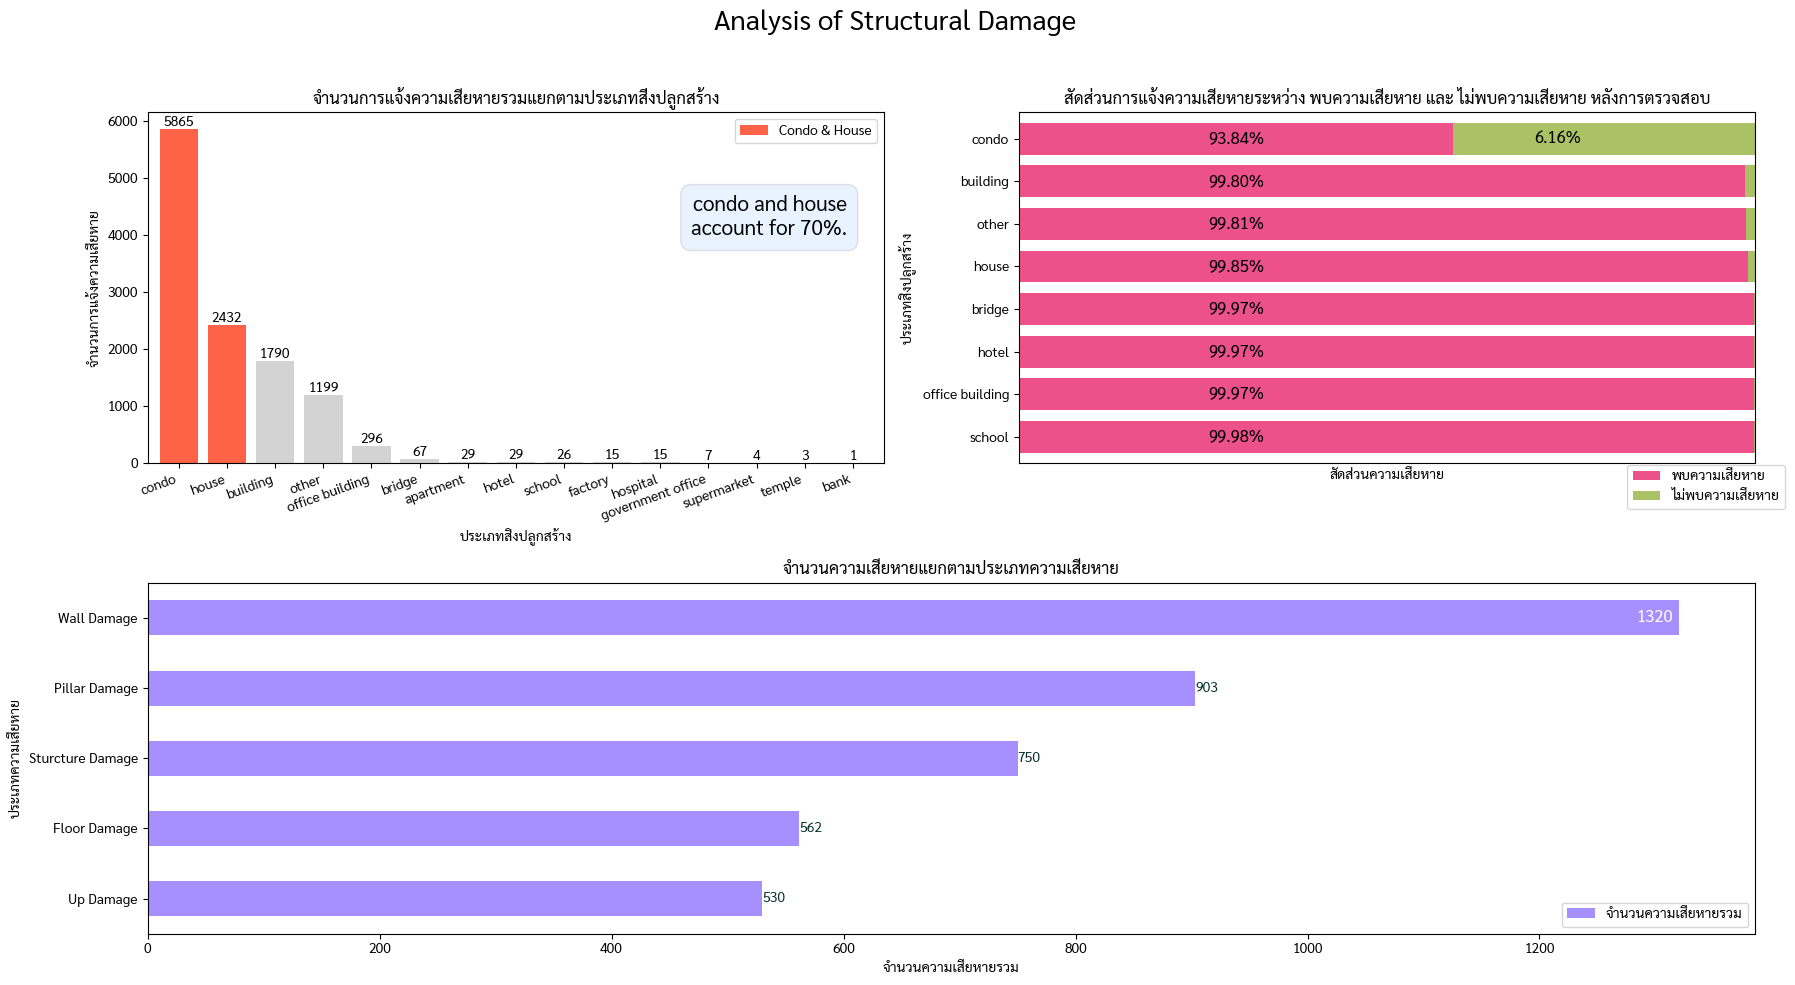

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าฟอนต์และป้องกันปัญหาการแสดงผลเครื่องหมายลบ
plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False

# สมมติตัวอย่างข้อมูล (แทนที่ด้วยข้อมูลจริงของคุณ)


# สร้าง figure และ axes สำหรับ 3 กราฟ โดยใช้ GridSpec
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2)  # กำหนดขนาด Grid เป็น 2 แถว 2 คอลัมน์

# กำหนดตำแหน่งของแต่ละ subplot
ax1 = fig.add_subplot(gs[0, 0])  # กราฟที่ 1: แถวที่ 0, คอลัมน์ที่ 0
ax2 = fig.add_subplot(gs[0, 1])  # กราฟที่ 2: แถวที่ 0, คอลัมน์ที่ 1
ax3 = fig.add_subplot(gs[1, :])  # กราฟที่ 3: แถวที่ 1, ใช้ทั้ง 2 คอลัมน์

# กราฟที่ 1 (ax1): จำนวนการแจ้งความเสียหายรวมแยกตามประเภทสิ่งปลูกสร้าง
colors = ['tomato' if bldg in ['condo', 'house'] else 'lightgray' for bldg in data_building_zone_reset['BLDG_T']]
ax = data_building_zone_reset.plot(kind="bar", x="BLDG_T", y="sum_building", ax=ax1, width=0.8, color=colors)
ax.bar_label(ax.containers[0])
ax.set_title("จำนวนการแจ้งความเสียหายรวมแยกตามประเภทสิ่งปลูกสร้าง")
ax.set_ylabel("จำนวนการแจ้งความเสียหาย")
ax.set_xlabel("ประเภทสิ่งปลูกสร้าง")
ax1.set_xticklabels(data_building_zone_reset['BLDG_T'], rotation=20, ha='right')
ax.legend(["Condo & House"], loc='upper right')
ax.text(0.95, 0.7, 'condo and house\naccount for 70%.',
        transform=ax.transAxes, ha='right', va='center', fontsize=15,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='dodgerblue', alpha=0.1))

# กราฟที่ 2 (ax2): สัดส่วนการแจ้งความเสียหายระหว่าง พบความเสียหาย และ ไม่พบความเสียหาย (จาก Code 2)
no_dmg_reset["p_yes"] = 100 - no_dmg_reset["p_no"]
no_dmg_plot = no_dmg_reset[["BLDG_T", "p_yes", "p_no"]].plot(
    kind="barh", x='BLDG_T', stacked=True, xlim=(85, 100), ax=ax2,
    ylabel="ประเภทสิ่งปลูกสร้าง", xlabel="สัดส่วนความเสียหาย", width=0.75,
    color=["#ec518a", "#abc165"],
    title="สัดส่วนการแจ้งความเสียหายระหว่าง พบความเสียหาย และ ไม่พบความเสียหาย หลังการตรวจสอบ"
)
ax2.set_xticks([])  # ซ่อน xticks
ax2.legend(labels=["พบความเสียหาย", "ไม่พบความเสียหาย"], loc='lower right', bbox_to_anchor=(1.05, -0.15))

# การติด Label สำหรับ 'p_no' (ไม่พบความเสียหาย) - แสดงเมื่อค่า > 1
for i, bar in enumerate(no_dmg_plot.containers[1].patches):
    value = no_dmg_reset['p_no'].iloc[i]
    if value > 1:
        x_pos = 95.5  # วาง Label ใกล้ขอบซ้ายของขอบเขต
        y_pos = bar.get_y() + bar.get_height() / 2
        no_dmg_plot.text(
            x_pos, y_pos, f'{value:.2f}%', ha='left', va='center',
            color='black', fontsize=12, fontweight='bold'
        )


for i, bar in enumerate(no_dmg_plot.containers[0].patches):
    value = no_dmg_reset['p_yes'].iloc[i]
    x_pos = 90
    y_pos = bar.get_y() + bar.get_height() / 2
    no_dmg_plot.text(
        x_pos, y_pos, f'{value:.2f}%', ha='right', va='center',
        color='black', fontsize=12
    )


strc_dmg.plot(kind="barh", ax=ax3, x="Damage Type", xlabel="จำนวนความเสียหายรวม", ylabel="ประเภทความเสียหาย",
              title="จำนวนความเสียหายแยกตามประเภทความเสียหาย", color="#a690ff", width=0.5)
ax3.legend(["จำนวนความเสียหายรวม"])
max_value = strc_dmg['Damage count'].max()

for i, bar in enumerate(ax3.patches):
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    if xval == max_value:
        ax3.text(xval - 5, yval, strc_dmg['Damage count'].iloc[i], ha='right', va='center',
                 color='white', fontsize=12, fontweight='bold')
    else:
        ax3.text(xval, yval, strc_dmg['Damage count'].iloc[i], ha='left', va='center', color='#023024')


fig.suptitle('Analysis of Structural Damage', fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])


#plt.savefig('Analysis of Structural Damage.png', dpi=300, bbox_inches='tight')


plt.show()

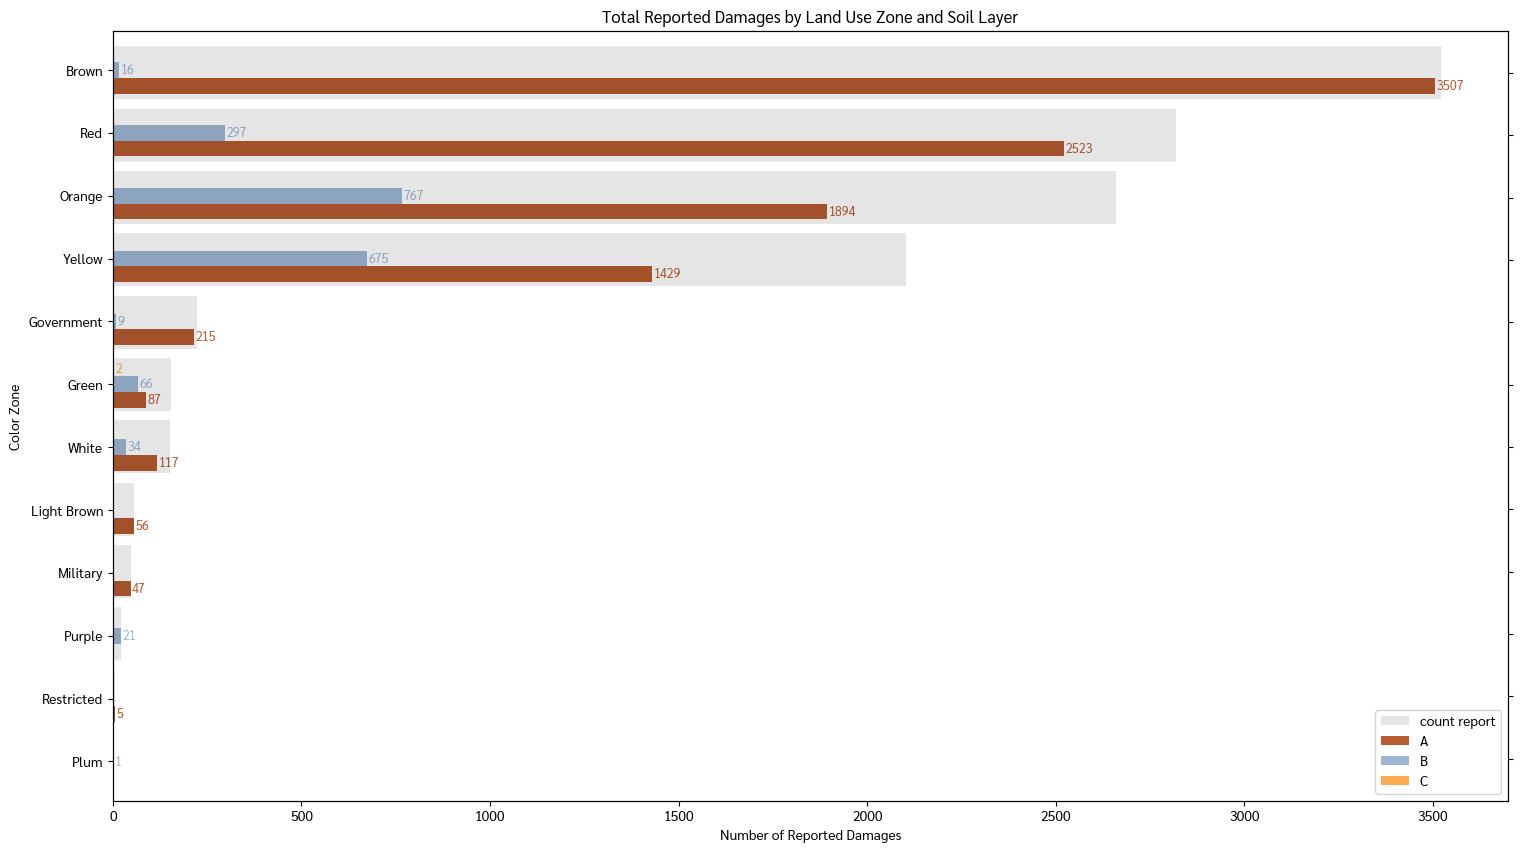

In [60]:

zone_color = pd.pivot_table(df,index = "ผังสี",columns= "Zoning",aggfunc="size")
zone_color["count report"] = zone_color.sum(axis=1)
zone_color = zone_color.reset_index().rename(columns = {"ผังสี": "Color zone"})
zone_color=zone_color.sort_values("count report" ,ascending=True)
new_names = {
    "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง": 'Orange',
    "สีแดง : พาณิชยกรรม": 'Red',
    "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก": 'Brown',
    "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย": 'Yellow',
    "สีเขียว : ชนบทและเกษตร": 'Green',
    "สีขาว : อนุรักษ์ชนบทและเกษตร": 'White',
    "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย": 'Light Brown',
    "สีม่วง : อุตสาหกรรม": 'Purple',
    "สีเม็ดมะปราง : คลัง": 'Plum',
    "สถานที่ราชการ": 'Government',
    "พื้นที่ทหาร": 'Military',
    "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้": 'Restricted'
}

zone_color['Color zone'] = zone_color['Color zone'].replace(new_names)
#zone_color = zone_color.drop(columns="count report")


fig, ax1 = plt.subplots(figsize=(18,10))
colors = ['#b65b30', '#9cb7d4', '#fdac53']
zone_color.plot(kind = "barh", y = ["A", 'B', 'C'], x = "Color zone" , ax = ax1, zorder = 1, color = colors,width = 0.75,fontsize=10, title = "Total Reported Damages by Land Use Zone and Soil Layer",xlabel = "Number of Reported Damages", ylabel = "Color Zone")
ax2 = ax1.twinx()
zone_color.plot(kind = "barh", y = "count report", ax = ax2, alpha=0.1, zorder=2,width = 0.85, color = "black")
ax2.set_yticklabels([])
legend = ax2.legend()
legend.set_visible(False)
for i, container in enumerate(ax1.containers):
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax1.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                         xytext=(1, 0), textcoords="offset points",
                         ha='left', va='center', fontsize=9, color=colors[i], fontweight="bold")
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles2 + handles1, labels=labels2 + labels1)

#plt.tight_layout()
#plt.savefig('Total Reported Damages by Building Type and Soil Layer2', dpi=300, bbox_inches='tight')
plt.show()


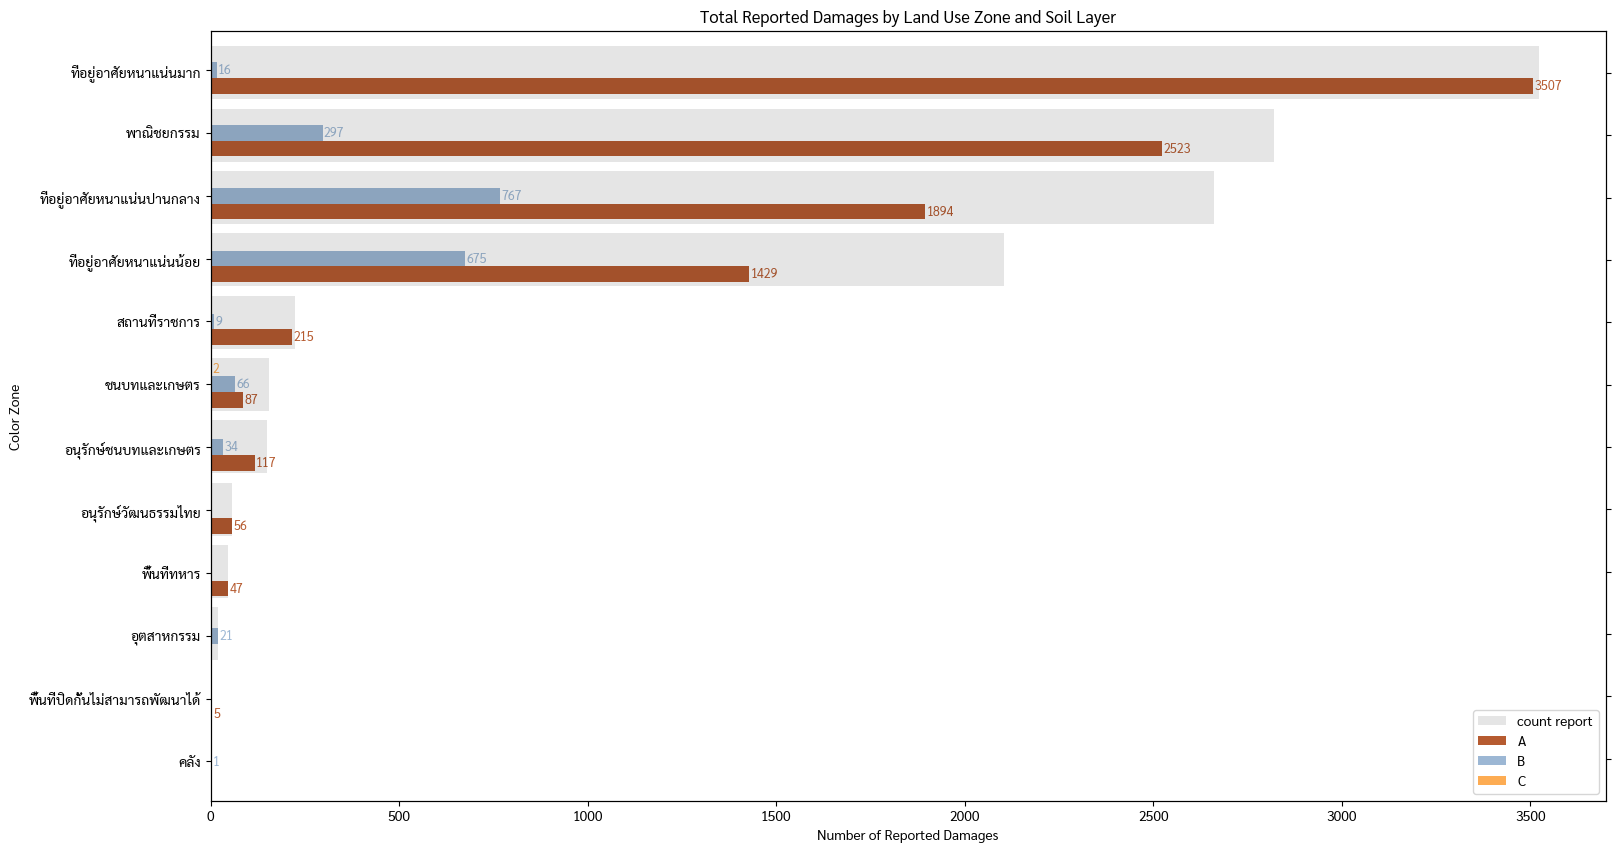

In [61]:

zone_color = pd.pivot_table(df,index = "ผังสี",columns= "Zoning",aggfunc="size")
zone_color["count report"] = zone_color.sum(axis=1)
zone_color = zone_color.reset_index().rename(columns = {"ผังสี": "Color zone"})
zone_color=zone_color.sort_values("count report" ,ascending=True)
new_names = {
    "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง": 'Orange',
    "สีแดง : พาณิชยกรรม": 'Red',
    "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก": 'Brown',
    "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย": 'Yellow',
    "สีเขียว : ชนบทและเกษตร": 'Green',
    "สีขาว : อนุรักษ์ชนบทและเกษตร": 'White',
    "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย": 'Light Brown',
    "สีม่วง : อุตสาหกรรม": 'Purple',
    "สีเม็ดมะปราง : คลัง": 'Plum',
    "สถานที่ราชการ": 'Government',
    "พื้นที่ทหาร": 'Military',
    "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้": 'Restricted'
}

zone_color['Color zone'] = zone_color['Color zone'].replace(new_names)
#zone_color = zone_color.drop(columns="count report")
swapped_names = {
    'Orange': "ที่อยู่อาศัยหนาแน่นปานกลาง",
    'Red': "พาณิชยกรรม",
    'Brown': "ที่อยู่อาศัยหนาแน่นมาก",
    'Yellow': "ที่อยู่อาศัยหนาแน่นน้อย",
    'Green': "ชนบทและเกษตร",
    'White': "อนุรักษ์ชนบทและเกษตร",
    'Light Brown': "อนุรักษ์วัฒนธรรมไทย",
    'Purple': "อุตสาหกรรม",
    'Plum': "คลัง",
    'Government': "สถานที่ราชการ",
    'Military': "พื้นที่ทหาร",
    'Restricted': "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้"
}
zone_color['Color zone'] = zone_color['Color zone'].replace(swapped_names)
fig, ax1 = plt.subplots(figsize=(18,10))
colors = ['#b65b30', '#9cb7d4', '#fdac53']
zone_color.plot(kind = "barh", y = ["A", 'B', 'C'], x = "Color zone" , ax = ax1, zorder = 1, color = colors,width = 0.75,fontsize=10, title = "Total Reported Damages by Land Use Zone and Soil Layer",xlabel = "Number of Reported Damages", ylabel = "Color Zone")
ax2 = ax1.twinx()
zone_color.plot(kind = "barh", y = "count report", ax = ax2, alpha=0.1, zorder=2,width = 0.85, color = "black")
ax2.set_yticklabels([])
legend = ax2.legend()
legend.set_visible(False)
for i, container in enumerate(ax1.containers):
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax1.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                         xytext=(1, 0), textcoords="offset points",
                         ha='left', va='center', fontsize=9, color=colors[i], fontweight="bold")
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles2 + handles1, labels=labels2 + labels1)

#plt.tight_layout()
#plt.savefig('Total Reported Damages by Building Type and Soil Layer2', dpi=300, bbox_inches='tight')
plt.show()


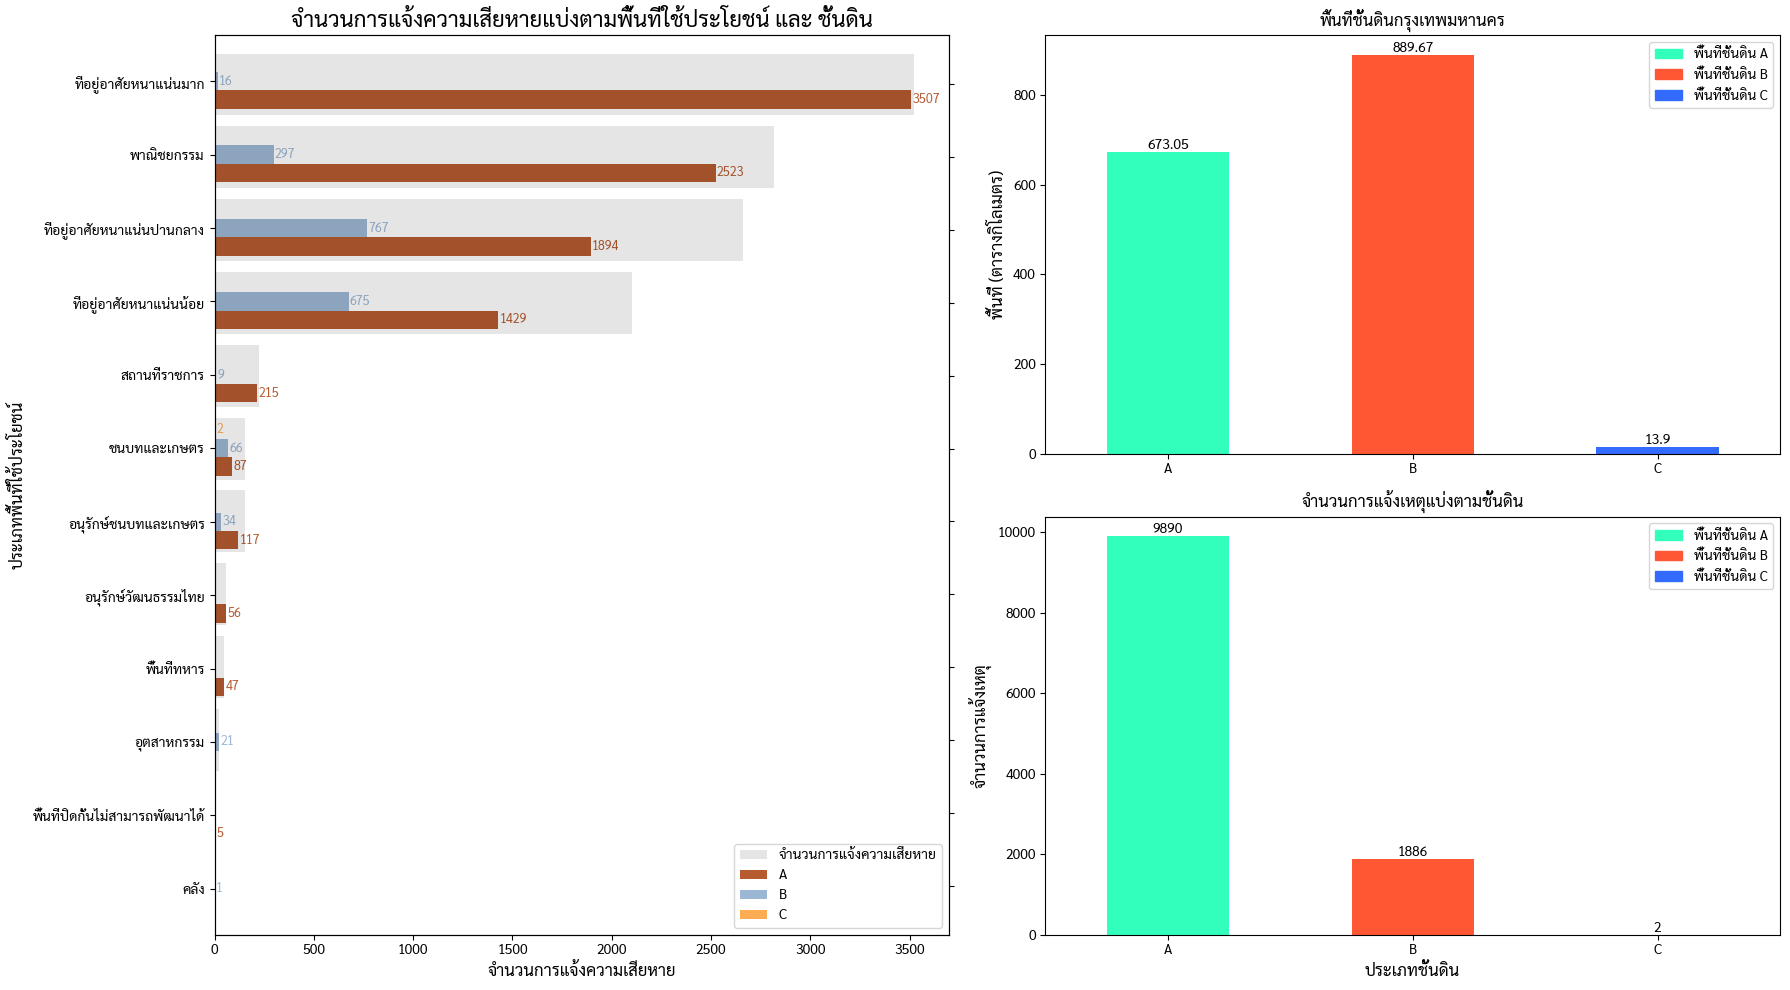

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False



# Data preprocessing for the horizontal bar chart
zone_color = pd.pivot_table(df, index="ผังสี", columns="Zoning", aggfunc="size", fill_value=0)
zone_color["count report"] = zone_color.sum(axis=1)
zone_color = zone_color.reset_index().rename(columns={"ผังสี": "Color zone"})
zone_color = zone_color.sort_values("count report", ascending=True)
new_names = {
    "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง": 'Orange',
    "สีแดง : พาณิชยกรรม": 'Red',
    "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก": 'Brown',
    "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย": 'Yellow',
    "สีเขียว : ชนบทและเกษตร": 'Green',
    "สีขาว : อนุรักษ์ชนบทและเกษตร": 'White',
    "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย": 'Light Brown',
    "สีม่วง : อุตสาหกรรม": 'Purple',
    "สีเม็ดมะปราง : คลัง": 'Plum',
    "สถานที่ราชการ": 'Government',
    "พื้นที่ทหาร": 'Military',
    "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้": 'Restricted'
}
zone_color['Color zone'] = zone_color['Color zone'].replace(new_names)
swapped_names = {
    'Orange': "ที่อยู่อาศัยหนาแน่นปานกลาง",
    'Red': "พาณิชยกรรม",
    'Brown': "ที่อยู่อาศัยหนาแน่นมาก",
    'Yellow': "ที่อยู่อาศัยหนาแน่นน้อย",
    'Green': "ชนบทและเกษตร",
    'White': "อนุรักษ์ชนบทและเกษตร",
    'Light Brown': "อนุรักษ์วัฒนธรรมไทย",
    'Purple': "อุตสาหกรรม",
    'Plum': "คลัง",
    'Government': "สถานที่ราชการ",
    'Military': "พื้นที่ทหาร",
    'Restricted': "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้"
}
zone_color['Color zone'] = zone_color['Color zone'].replace(swapped_names)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2)  # A 2x2 grid

ax_left = fig.add_subplot(gs[0:, 0])  # Use gs[0:, 0] to span all rows in column 0
colors_left = ['#b65b30', '#9cb7d4', '#fdac53']
zone_color.plot(kind="barh", y=["A", 'B', 'C'], x="Color zone", ax=ax_left, zorder=1,
                color=colors_left, width=0.75, fontsize=10)
ax_left.set_title("จำนวนการแจ้งความเสียหายแบ่งตามพื้นที่ใช้ประโยชน์ และ ชั้นดิน", fontsize=16)
ax_left.set_xlabel("จำนวนการแจ้งความเสียหาย", fontsize=12)
ax_left.set_ylabel("ประเภทพื้นที่ใช้ประโยชน์", fontsize=12)

ax_left_twin = ax_left.twinx()
zone_color.plot(kind="barh", y="count report", ax=ax_left_twin, alpha=0.1, zorder=2, width=0.85, color="black",label = "จำนวนการแจ้งความเสียหาย")
ax_left_twin.set_yticklabels([])
ax_left_twin.legend().set_visible(False)


for i, container in enumerate(ax_left.containers):
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax_left.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                             xytext=(1, 0), textcoords="offset points",
                             ha='left', va='center', fontsize=9, color=colors_left[i], fontweight="bold")


handles1, labels1 = ax_left.get_legend_handles_labels()
handles2, labels2 = ax_left_twin.get_legend_handles_labels()
ax_left.legend(handles=handles2 + handles1, labels=labels2 + labels1, loc='lower right')

ax_right_top = fig.add_subplot(gs[0, 1])
ax_right_bottom = fig.add_subplot(gs[1, 1])

colors_area =  ['#33FFBD', '#FF5733', '#336BFF']
data_soil.plot(x="Zoning", y="area", kind="bar", ax=ax_right_top, title="พื้นที่ชั้นดินกรุงเทพมหานคร", color=colors_area)
ax_right_top.set_xlabel("")
ax_right_top.set_ylabel("พื้นที่ (ตารางกิโลเมตร)", fontsize=12)
ax_right_top.bar_label(ax_right_top.containers[0], fontsize=10)
ax_right_top.tick_params(axis='x', rotation=0)
legend_patches_area = [mpatches.Patch(color=c, label=f'พื้นที่ชั้นดิน {l}') for c, l in zip(colors_area, ['A', 'B', 'C'])]
ax_right_top.legend(handles=legend_patches_area, loc='upper right')


colors_report = ['#33FFBD', '#FF5733', '#336BFF']
data_soil_report_reset.plot(kind="bar", x="Zoning", y="report", ax=ax_right_bottom,
                            title="จำนวนการแจ้งเหตุแบ่งตามชั้นดิน", color=colors_report)
ax_right_bottom.set_xlabel("ประเภทชั้นดิน", fontsize=12)
ax_right_bottom.set_ylabel("จำนวนการแจ้งเหตุ", fontsize=12)
ax_right_bottom.bar_label(ax_right_bottom.containers[0], fontsize=10)
ax_right_bottom.tick_params(axis='x', rotation=0)
legend_patches_report = [mpatches.Patch(color=c, label=f'พื้นที่ชั้นดิน {l}') for c, l in zip(colors_report, ['A', 'B', 'C'])]
ax_right_bottom.legend(handles=legend_patches_report, loc='upper right')


plt.tight_layout()
#plt.savefig('Analysis of Location.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
data_soil

,Zoning,area_m2,area
0,A,6.730504e+08,673.05
1,B,8.896725e+08,889.67
2,C,1.389691e+07,13.90


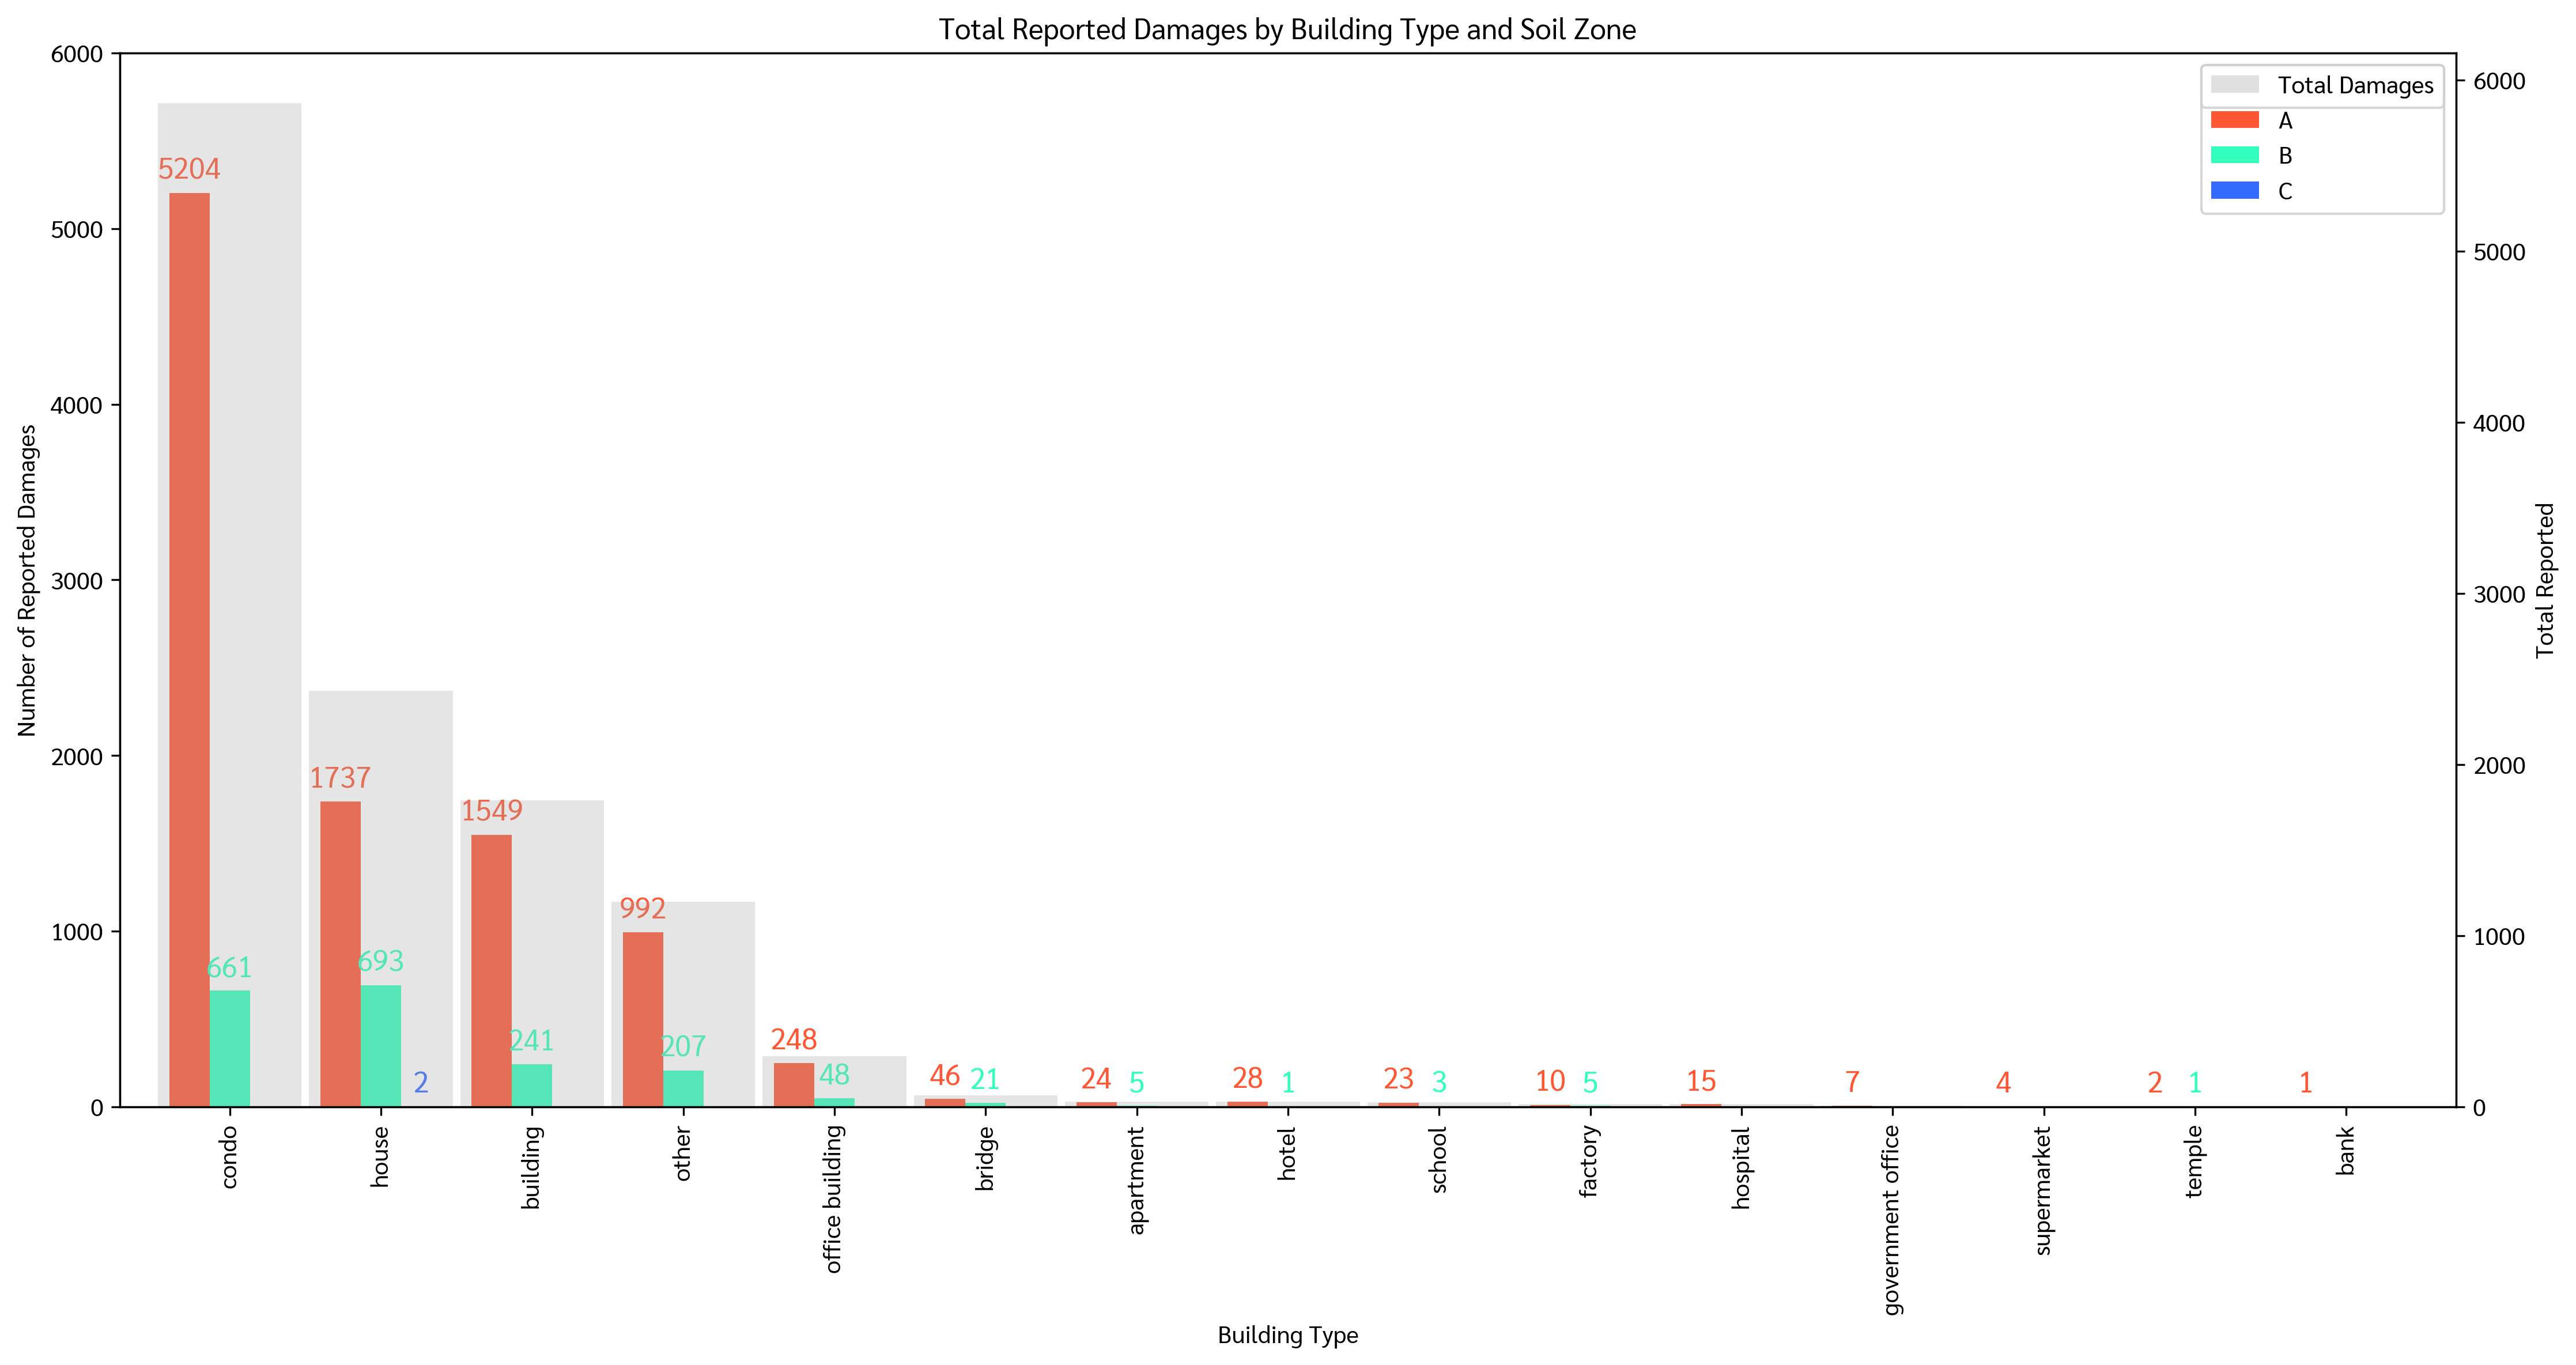

In [64]:
fig, ax1 = plt.subplots(figsize=(15, 8),dpi = 300)


colors = ['#FF5733', '#33FFBD', '#336BFF']
data_building_zone_reset.plot(x="BLDG_T", y=["A", "B", "C"], kind='bar', ax=ax1, color=colors, width=0.8, zorder=1) # Added zorder for the first bars
ax1.set_ylabel("Number of Reported Damages")
ax1.set_xlabel("Building Type")
ax1.set_title("Total Reported Damages by Building Type and Soil Zone")
ax1.set_yticks(range(0, 6001, 1000))


for i, container in enumerate(ax1.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom', fontsize=12, color=colors[i])

ax2 = ax1.twinx()


data_building_zone_reset.plot(x="BLDG_T", y="sum_building", kind='bar', ax=ax2, color='darkgray', label='Total Damages', alpha=0.3, zorder=2,width = 0.95) # Added alpha and zorder for the second bars
ax2.set_ylabel("Total Reported")
ax2.set_yticks(range(0, 6001, 1000))

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles2 + handles1, labels=labels2 + labels1)

plt.xlabel("Building Type")

plt.tight_layout()
#plt.savefig('Total Reported Damages by Building Type and Soil Layer2', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
zone_color = pd.pivot_table(df, index="ผังสี", columns="Zoning", aggfunc="size", fill_value=0)
zone_color = zone_color.reset_index()
zone_color = zone_color.rename(columns= {"ผังสี": "Color zone"})
zone_color = zone_color.sort_values("Color zone",ascending=True)

new_names = {
    "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง": 'Orange',
    "สีแดง : พาณิชยกรรม": 'Red',
    "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก": 'Brown',
    "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย": 'Yellow',
    "สีเขียว : ชนบทและเกษตร": 'Green',
    "สีขาว : อนุรักษ์ชนบทและเกษตร": 'White',
    "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย": 'Light Brown',
    "สีม่วง : อุตสาหกรรม": 'Purple',
    "สีเม็ดมะปราง : คลัง": 'Plum',
    "สถานที่ราชการ": 'Government',
    "พื้นที่ทหาร": 'Military',
    "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้": 'Restricted'
}

zone_color['Color zone'] = zone_color['Color zone'].replace(new_names)

zone_color

Zoning,Color zone,A,B,C
0,Military,47,0,0
1,Restricted,5,0,0
2,Government,215,9,0
3,White,117,34,0
4,Brown,3507,16,0
5,Light Brown,56,0,0
6,Purple,0,21,0
7,Orange,1894,767,0
8,Green,87,66,2
9,Plum,0,1,0


In [66]:
df.head(3)

,LOCATION_ID,LAT,LON,DATE_D,TIME_T,HOUR_,MINUTE_,SECOND_,PROVINCE,DISTRICT,...,SUB_ZONE,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,ผังสี,สีdis
0,1375623100571162025032900:04:36137,13.75623,100.57116,วันเสาร์ที่ 29 มีนาคม 2025,31/12/1899 00:04:36,0.0,4.0,36.0,กรุงเทพมหานคร,ห้วยขวาง,...,ย.๙-,ต.ค.-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก,ห้วยขวาง-สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก
1,1377853100576312025032901:08:55295,13.77853,100.57631,วันเสาร์ที่ 29 มีนาคม 2025,31/12/1899 01:08:55,1.0,8.0,55.0,กรุงเทพมหานคร,ห้วยขวาง,...,ย.๙-,ต.ค.-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก,ห้วยขวาง-สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก
2,1377826100574042025032901:31:45101,13.77826,100.57404,วันเสาร์ที่ 29 มีนาคม 2025,31/12/1899 01:31:45,1.0,31.0,45.0,กรุงเทพมหานคร,ห้วยขวาง,...,ย.๙-,ต.ค.-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก,ห้วยขวาง-สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก


## Safe Zone Analysis

In [67]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/safe_zone.csv")
df = df.rename(columns={" save zone/pop":"save zone/pop"})
df = df.dropna()

[Text(0, 0, '1283.3'),
 Text(0, 0, '710.2'),
 Text(0, 0, '707.0'),
 Text(0, 0, '629.2'),
 Text(0, 0, '538.9'),
 Text(0, 0, '432.2'),
 Text(0, 0, '355.5'),
 Text(0, 0, '352.5'),
 Text(0, 0, '294.4'),
 Text(0, 0, '293.0'),
 Text(0, 0, '286.3'),
 Text(0, 0, '260.8'),
 Text(0, 0, '247.5'),
 Text(0, 0, '235.2'),
 Text(0, 0, '227.8'),
 Text(0, 0, '222.8'),
 Text(0, 0, '218.8'),
 Text(0, 0, '206.2'),
 Text(0, 0, '197.4'),
 Text(0, 0, '185.4'),
 Text(0, 0, '180.5'),
 Text(0, 0, '176.3'),
 Text(0, 0, '170.8'),
 Text(0, 0, '168.7'),
 Text(0, 0, '167.7'),
 Text(0, 0, '156.0'),
 Text(0, 0, '155.9'),
 Text(0, 0, '153.9'),
 Text(0, 0, '152.5'),
 Text(0, 0, '146.5'),
 Text(0, 0, '145.8'),
 Text(0, 0, '138.2'),
 Text(0, 0, '136.6'),
 Text(0, 0, '132.2'),
 Text(0, 0, '120.0'),
 Text(0, 0, '119.8'),
 Text(0, 0, '105.4'),
 Text(0, 0, '102.6'),
 Text(0, 0, '96.8'),
 Text(0, 0, '94.1'),
 Text(0, 0, '88.9'),
 Text(0, 0, '85.8'),
 Text(0, 0, '71.2'),
 Text(0, 0, '68.7'),
 Text(0, 0, '67.9'),
 Text(0, 0, '60.

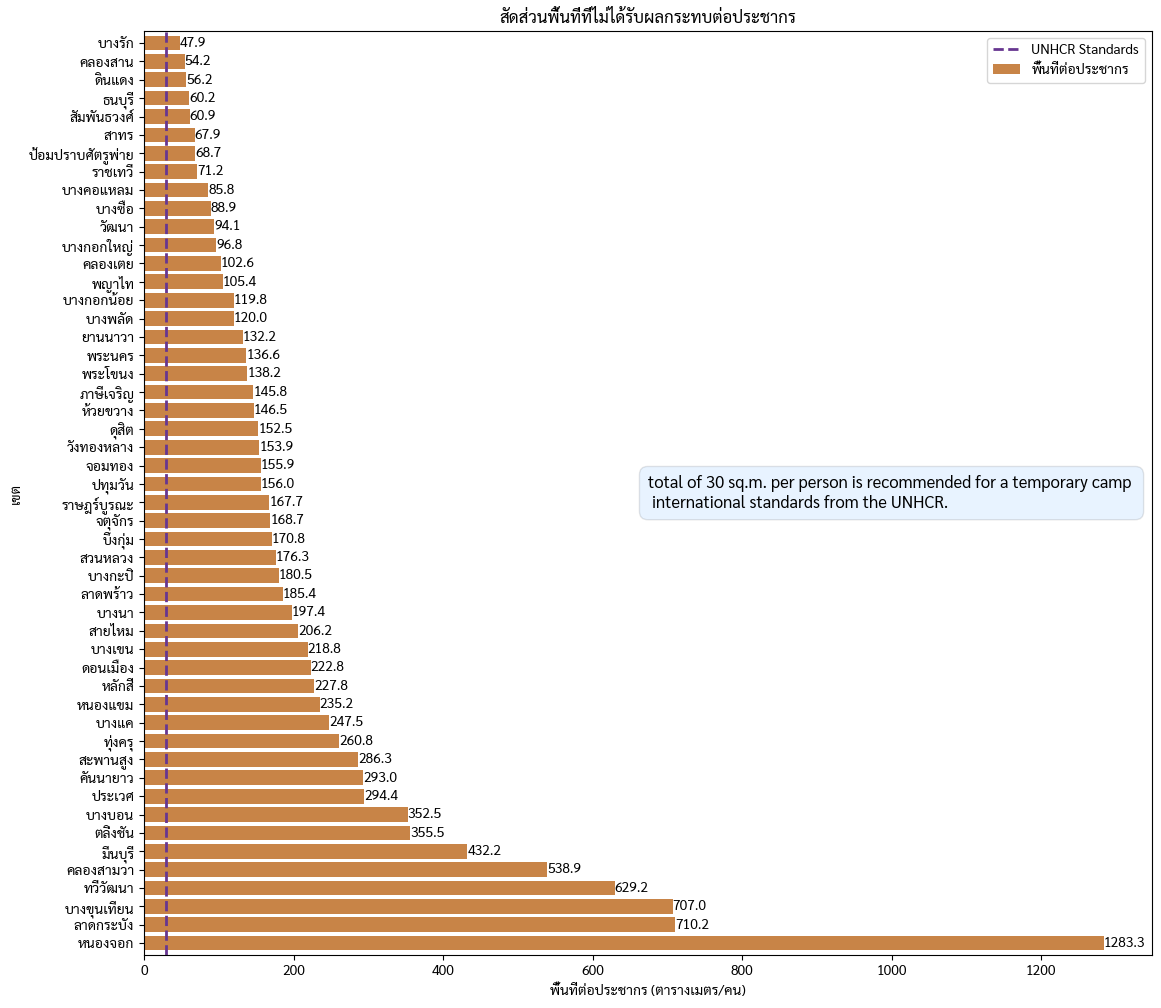

In [68]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf


import matplotlib.font_manager as fm
fm.fontManager.addfont('Sarabun-Regular.ttf')

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Sarabun'
plt.rcParams['axes.unicode_minus'] = False
data_savezone_pop = df[["DISTRICT_N","save zone/pop"]].sort_values("save zone/pop",ascending=False)
save_zone_per_pop = data_savezone_pop.plot(kind = "barh", x = "DISTRICT_N",y = "save zone/pop",figsize = (13,12),width = 0.8,
                            title = "สัดส่วนพื้นที่ที่ไม่ได้รับผลกระทบต่อประชากร",xlabel = "พื้นที่ต่อประชากร (ตารางเมตร/คน)",
                            ylabel= "เขต",
                            label='พื้นที่ต่อประชากร', color = "#c88447")
target_value = 30
plt.axvline(
    x=target_value,
    color='#673690',
    linestyle='--',
    linewidth=2,
    label="UNHCR Standards"
)

plt.legend()
#plt.xticks(rotation = 30)
save_zone_per_pop.text(
    0.5, 0.5,
    'total of 30 sq.m. per person is recommended for a temporary camp \n international standards from the UNHCR.',
    transform=save_zone_per_pop.transAxes,
    ha='left',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='dodgerblue', alpha=0.1)
)


save_zone_per_pop.bar_label(save_zone_per_pop.containers[0], fmt='%.1f')

#plt.savefig('Proportion of Safe Zone per District Population', dpi=300, bbox_inches='tight')
